In [ ]:
pip install -U mplsoccer

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import numpy as np
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

In [ ]:
# Reading JSON data from a file
with open("2128286_tracking_data_ff.json") as f:
    json_data = json.load(f)

df = pd.DataFrame(json_data)
df.head(5)

,frame,event_id,type_id,ball_loc_x,ball_loc_y,ball_loc_x_opta,ball_loc_y_opta,adjusted_data
0,1391,2253487625,1,-9.6960,1.1800,40.7657,51.7354,"[{'team': 1, 'team_status': 'defense', 'x': 20..."
1,1411,2253487639,1,-22.2098,-0.3969,28.8478,49.4163,"[{'team': 1, 'team_status': 'defense', 'x': 23..."
2,1461,2253487685,1,-0.2291,-20.5120,49.7818,19.8353,"[{'team': 90, 'team_status': 'offense', 'x': 2..."
3,1501,2253487689,13,-1.0000,-1.0000,-1.0000,-1.0000,"[{'team': 90, 'team_status': 'offense', 'x': 3..."
4,1831,2253488053,1,-47.5980,-0.0597,4.6686,49.9122,"[{'team': 1, 'team_status': 'offense', 'x': -4..."


In [ ]:
positions = pd.DataFrame(columns= ['team',
  'team_status',
  'x',
  'x_opta',
  'y_opta',
  'y',
  'vx',
  'vy',
  'ax',
  'ay',
  'player_id',
  'player_position',
  'player_with_event'])


for i in range (len(df)):
  positions = positions.append(df['adjusted_data'][i])

positions = positions.reset_index()

club = []
for l in range (len(positions)):
  club.append('Man United' if (positions['team'][l] == 1) else 'Burnley')

club = pd.DataFrame(club, columns=['club'])
positions = pd.concat([positions,club], axis=1)

In [ ]:
event = []
event_id = []

for j in range (len(df)):
  event.append(len(df['adjusted_data'][j]))

for k in range (len(df)):
  event_id.append((df['event_id'][k]))

event_id = list(map(int, event_id))

a = [i for i in range(1, len(df))]

result_event = [x for x, n in zip(a, event) for _ in range(n)]
result_event = pd.DataFrame({'event number': result_event})
result_event = result_event.reset_index()

result_event_id = [x for x, n in zip(event_id, event) for _ in range(n)]
result_event_id = pd.DataFrame({'eventId': result_event_id})
result_event_id = result_event_id.reset_index()

positions = pd.concat([positions,result_event,result_event_id], axis=1)
positions.head(10)

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,ay,player_id,player_position,player_with_event,club,index,event number,index,eventId
0,0,1,defense,20.5699,69.59,71.80,14.8252,0.1406,-0.2693,0.0,0.0,197365,RCB,False,Man United,0.0,1.0,0,2253487625
1,1,1,defense,19.6386,68.70,40.85,-6.2192,-0.3755,-0.0670,0.0,0.0,106760,LWB,False,Man United,1.0,1.0,1,2253487625
2,2,1,defense,20.9583,69.96,60.10,6.8664,0.2215,-0.1173,0.0,0.0,95658,LCB,False,Man United,2.0,1.0,2,2253487625
3,3,90,offense,1.3090,51.25,75.83,17.5660,3.4401,-1.7631,0.0,0.0,60689,RF,False,Burnley,3.0,1.0,3,2253487625
4,4,90,offense,-22.8974,28.19,77.05,18.3917,0.1564,0.7657,0.0,0.0,51927,LCB,False,Burnley,4.0,1.0,4,2253487625
5,5,90,offense,-24.7430,26.44,51.82,1.2345,0.0869,-0.3566,0.0,0.0,17761,RCB,False,Burnley,5.0,1.0,5,2253487625
6,6,90,offense,-15.8818,34.87,24.94,-17.0374,0.5768,-1.2105,0.0,0.0,68983,RWB,False,Burnley,6.0,1.0,6,2253487625
7,7,1,defense,8.4480,58.05,38.49,-7.8252,0.2740,1.0889,0.0,0.0,148225,LW,False,Man United,7.0,1.0,7,2253487625
8,8,1,defense,-0.7852,49.25,38.03,-8.1411,-3.2232,1.9560,0.0,0.0,40720,CF,False,Man United,8.0,1.0,8,2253487625
9,9,90,offense,-5.6760,44.59,89.42,26.8074,0.9119,0.5154,0.0,0.0,39487,LWB,False,Burnley,9.0,1.0,9,2253487625


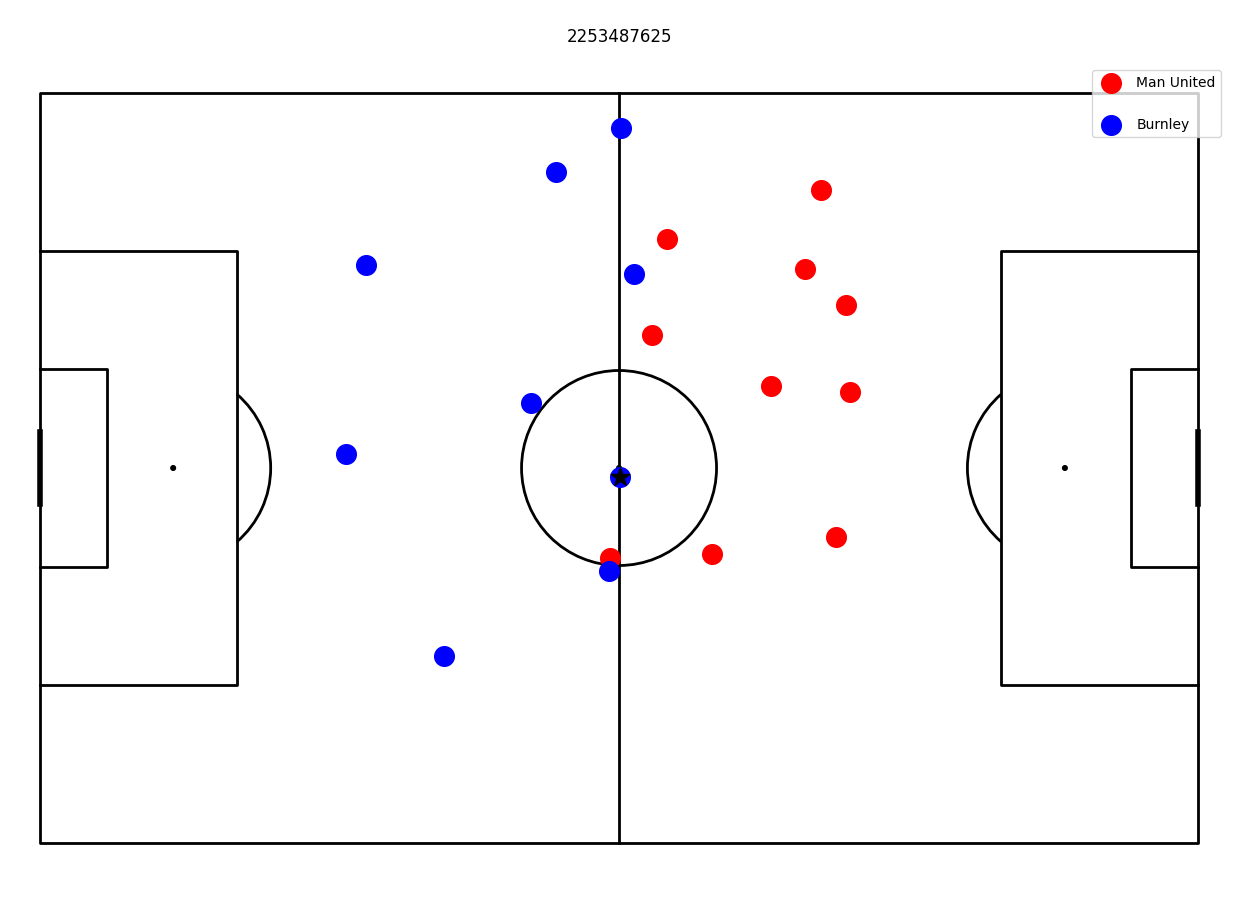

In [ ]:
#create pitch
pitch = Pitch(line_color='black', pitch_type = 'opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(positions[(positions['event number'] == 1.0) & (positions['team'] == 1)]['x_opta'],positions[(positions['event number'] == 1.0) & (positions['team'] == 1)]['y_opta'], color = 'red',ax=ax['pitch'],alpha = 1, s = 200, label = positions[(positions['event number'] == 1.0) & (positions['team'] == 1)]['club'].iloc[0])
#pitch.annotate(positions['player_position'],xytext=(50, 50) ,positions[(positions['event number'] == 1.0) & (positions['team'] == 1)][['x_opta','y_opta']] ,ax=ax['pitch'], fontsize = 12)
pitch.scatter(positions[(positions['event number'] == 1.0) & (positions['team'] == 90)]['x_opta'],positions[(positions['event number'] == 1.0) & (positions['team'] == 90)]['y_opta'], color = 'blue',ax=ax['pitch'],alpha = 1, s = 200, label = positions[(positions['event number'] == 1.0) & (positions['team'] == 90)]['club'].iloc[0])
pitch.scatter(positions[(positions['event number'] == 1.0) & (positions['team'] == 90) & (positions['player_with_event'] == True)]['x_opta'],positions[(positions['event number'] == 1.0) & (positions['team'] == 90) & (positions['player_with_event'] == True)]['y_opta'], marker = '*', color = 'black',ax=ax['pitch'],alpha = 1, s = 200)
fig.suptitle(positions[positions['event number'] == 1.0]['eventId'].iloc[0])
ax['pitch'].legend(labelspacing=2)
plt.show()

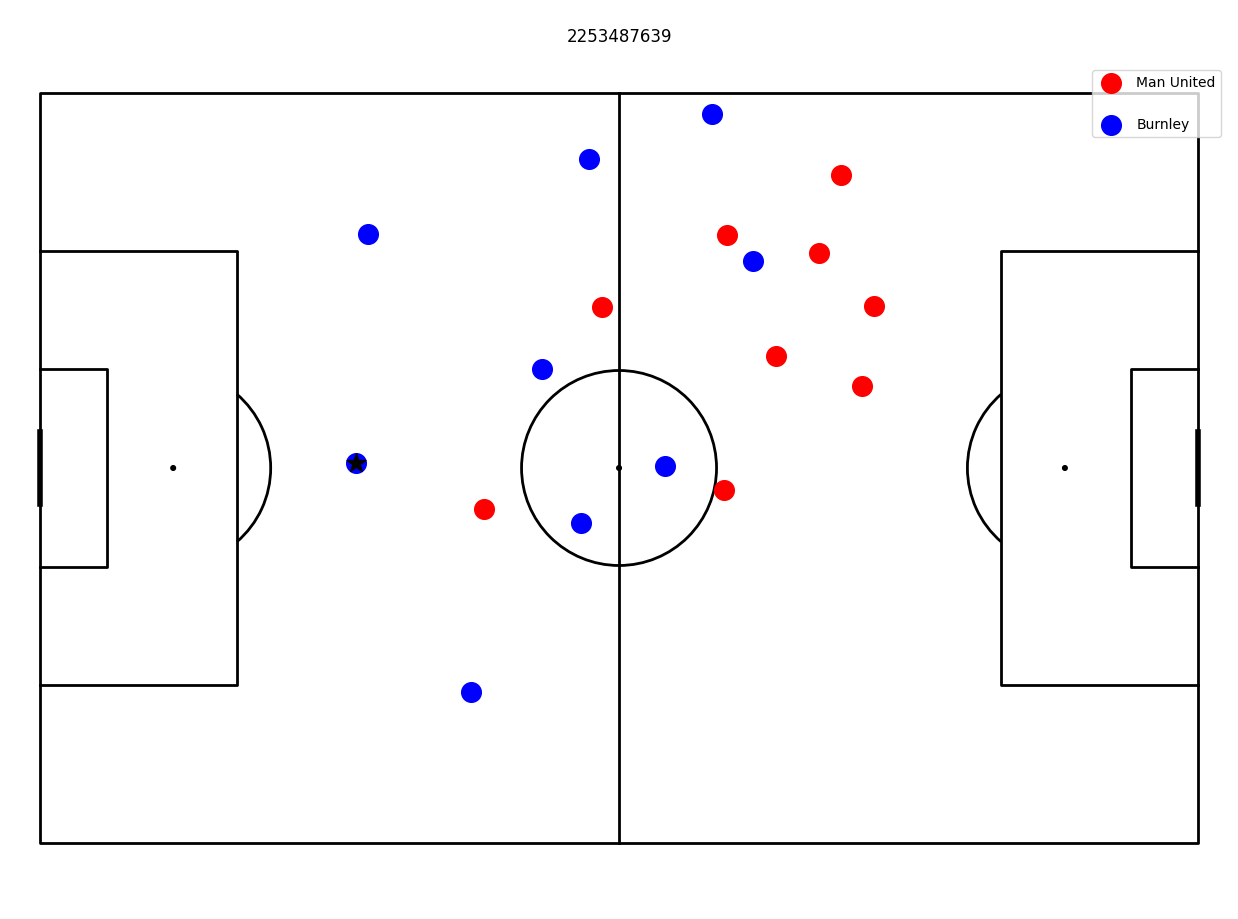

In [ ]:
#create pitch
pitch = Pitch(line_color='black', pitch_type = 'opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(positions[(positions['event number'] == 2.0) & (positions['team'] == 1)]['x_opta'],positions[(positions['event number'] == 2.0) & (positions['team'] == 1)]['y_opta'], color = 'red',ax=ax['pitch'],alpha = 1, s = 200, label = positions[(positions['event number'] == 2.0) & (positions['team'] == 1)]['club'].iloc[0])
#pitch.annotate(positions['player_position'],xytext=(50, 50) ,positions[(positions['event number'] == 1.0) & (positions['team'] == 1)][['x_opta','y_opta']] ,ax=ax['pitch'], fontsize = 12)
pitch.scatter(positions[(positions['event number'] == 2.0) & (positions['team'] == 90)]['x_opta'],positions[(positions['event number'] == 2.0) & (positions['team'] == 90)]['y_opta'], color = 'blue',ax=ax['pitch'],alpha = 1, s = 200, label = positions[(positions['event number'] == 2.0) & (positions['team'] == 90)]['club'].iloc[0])
pitch.scatter(positions[(positions['event number'] == 2.0) & (positions['team'] == 90) & (positions['player_with_event'] == True)]['x_opta'],positions[(positions['event number'] == 2.0) & (positions['team'] == 90) & (positions['player_with_event'] == True)]['y_opta'], marker = '*', color = 'black',ax=ax['pitch'],alpha = 1, s = 200)
fig.suptitle(positions[positions['event number'] == 2.0]['eventId'].iloc[0])
ax['pitch'].legend(labelspacing=2)
plt.show()

In [ ]:
# Reading JSON data from a file
with open("2128286.json") as f:
    json_data2 = json.load(f)

df2 = pd.DataFrame.from_dict(json_data2,orient='index')
df2 = df2.transpose()
df2.head(5)

,analysisType,requestDate,matches,players,views,widgets
0,possessionChain,2021-05-31T07:08:41.7438982Z,"[{'matchId': 2128286, 'matchDuration': 97, 'ho...","[{'playerId': 98747, 'playerName': 'Nick Pope'...",[{'viewName': '7895fb6f18ca422eb0d621a89736c95...,[]


In [ ]:
json_data2

In [ ]:
# Reading JSON data from a file
with open("2128286_ev.json") as f:
    json_data3 = json.load(f)

json_data3 # contains a list with many lists inside

In [ ]:
df3 = pd.DataFrame(json_data3)
df3

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,"{'eventId': 2253487625, 'eventTypeId': 1, 'out...","{'eventId': 2253487639, 'eventTypeId': 1, 'out...","{'eventId': 2253487685, 'eventTypeId': 1, 'out...","{'eventId': 2253487689, 'eventTypeId': 13, 'ou...",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'eventId': 2253488053, 'eventTypeId': 1, 'out...","{'eventId': 2253488059, 'eventTypeId': 1, 'out...","{'eventId': 2253488055, 'eventTypeId': 8, 'out...","{'eventId': 2253488071, 'eventTypeId': 61, 'ou...","{'eventId': 2253488079, 'eventTypeId': 1, 'out...","{'eventId': 2253488085, 'eventTypeId': 61, 'ou...","{'eventId': 2253488107, 'eventTypeId': 3, 'out...","{'eventId': 2253488123, 'eventTypeId': 7, 'out...",None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'eventId': 2253488265, 'eventTypeId': 1, 'out...","{'eventId': 2253488291, 'eventTypeId': 1, 'out...","{'eventId': 2253488303, 'eventTypeId': 1, 'out...","{'eventId': 2253488309, 'eventTypeId': 1, 'out...","{'eventId': 2253488333, 'eventTypeId': 61, 'ou...","{'eventId': 2253488355, 'eventTypeId': 1, 'out...","{'eventId': 2253536575, 'eventTypeId': 1, 'out...","{'eventId': 2253488431, 'eventTypeId': 1, 'out...","{'eventId': 2253488445, 'eventTypeId': 1, 'out...","{'eventId': 2253488489, 'eventTypeId': 1, 'out...",...,None,None,None,None,None,None,None,None,None,None
3,"{'eventId': 2253488655, 'eventTypeId': 1, 'out...","{'eventId': 2253488685, 'eventTypeId': 1, 'out...","{'eventId': 2253488719, 'eventTypeId': 1, 'out...","{'eventId': 2253488757, 'eventTypeId': 1, 'out...","{'eventId': 2253488771, 'eventTypeId': 1, 'out...","{'eventId': 2253488803, 'eventTypeId': 1, 'out...",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{'eventId': 2253488933, 'eventTypeId': 1, 'out...","{'eventId': 2253489033, 'eventTypeId': 1, 'out...","{'eventId': 2253489075, 'eventTypeId': 1, 'out...","{'eventId': 2253489123, 'eventTypeId': 1, 'out...","{'eventId': 2253489155, 'eventTypeId': 1, 'out...","{'eventId': 2253489179, 'eventTypeId': 1, 'out...","{'eventId': 2253489225, 'eventTypeId': 1, 'out...","{'eventId': 2253489273, 'eventTypeId': 1, 'out...","{'eventId': 2253489275, 'eventTypeId': 7, 'out...","{'eventId': 2253489287, 'eventTypeId': 61, 'ou...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"{'eventId': 2253526183, 'eventTypeId': 1, 'out...","{'eventId': 2253526187, 'eventTypeId': 1, 'out...","{'eventId': 2253526189, 'eventTypeId': 1, 'out...","{'eventId': 2253526199, 'eventTypeId': 12, 'ou...",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
175,"{'eventId': 2253526203, 'eventTypeId': 13, 'ou...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
176,"{'eventId': 2253526305, 'eventTypeId': 1, 'out...","{'eventId': 2253526307, 'eventTypeId': 1, 'out...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
177,"{'eventId': 2253526357, 'eventTypeId': 1, 'out...","{'eventId': 2253526361, 'eventTypeId': 1, 'out...","{'eventId': 2253526369, 'eventTypeId': 1, 'out...","{'eventId': 2253526371, 'eventTypeId': 1, 'out...","{'eventId': 2253526373, 'eventTypeId': 61, 'ou...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
data3 = []
for i in range (len(df3)):
  for j in range (len(df3.columns)):
    data3.append(df3.iloc[i][j])

data3 = [event for event in data3 if event is not None]
data3

In [ ]:
track_data = pd.DataFrame(data3, columns = ['eventId',
  'eventTypeId',
  'outcome',
  'min',
  'sec',
  'teamId',
  'playerId',
  'timeStamp',
  'qualifiers',
  'x',
  'y',
  'description'])

In [ ]:
track_data.head(5)

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
0,2253487625,1,True,0,0,90,60551,2021-01-12T20:16:48.181,"[{'qualifierId': 213, 'value': '3.1'}, {'quali...",50.3,50.3,Kick-off
1,2253487639,1,True,0,2,90,17761,2021-01-12T20:16:50.991,"[{'qualifierId': 178}, {'qualifierId': 213, 'v...",29.6,53.4,Successful Pass
2,2253487685,1,True,0,7,90,68983,2021-01-12T20:16:55.444,"[{'qualifierId': 1}, {'qualifierId': 213, 'val...",41.3,18.4,Successful Pass
3,2253487689,13,True,0,11,90,90517,2021-01-12T20:17:00.002,"[{'qualifierId': 108}, {'qualifierId': 55, 'va...",86.0,73.1,Miss
4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass


In [ ]:
burnley = track_data[(track_data['teamId'] == 90)]
ManUnited = track_data[(track_data['teamId'] == 1)]

burnley_passes = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 1)]
ManUnited_passes = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 1)]

burnley_dribbles = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 3)]
ManUnited_dribbles = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 3)]

burnley_fouls = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 4)]
ManUnited_fouls = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 4)]

burnley_out = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 5)]
ManUnited_out = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 5)]

burnley_corners = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 6)]
ManUnited_corners = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 6)]

burnley_tackles = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 7)]
ManUnited_tackles = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 7)]

burnley_interceptions = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 8)]
ManUnited_interceptions = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 8)]

burnley_turnover = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 9)]
ManUnited_turnover = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 9)]

burnley_gksave = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 10)]
ManUnited_gksave = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 10)]

burnley_gkevent = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 11)]
ManUnited_gkevent = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 11)]

burnley_clearance = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 12)]
ManUnited_clearance = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 12)]

burnley_missShot = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 13)]
ManUnited_missShot = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 13)]

burnley_post = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 14)]
ManUnited_post = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 14)]

burnley_shotSaved = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 15)]
ManUnited_shotSaved = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 15)]

burnley_goal = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 16)]
ManUnited_goal = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 16)]

burnley_card = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 17)]
ManUnited_card = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 17)]

burnley_playeroff = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 18)]
ManUnited_playeroff = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 18)]

burnley_playeron = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 19)]
ManUnited_playeron = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 19)]

burnley_retired = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 20)]
ManUnited_retired = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 20)]

burnley_returns = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 21)]
ManUnited_returns= track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 21)]

burnley_startDelay = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 27)]
ManUnited_startDelay = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 27)]

burnley_endDelay = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 28)]
ManUnited_endDelay = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 28)]

burnley_ht = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 30)]
ManUnited_ht = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 30)]

burnley_st = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 32)]
ManUnited_st = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 32)]

burnley_formationChange = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 40)]
ManUnited_formationChange = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 40)]

burnley_gkpunch = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 41)]
ManUnited_gkpunch = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 41)]

burnley_skill = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 42)]
ManUnited_skill = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 42)]

burnley_aerial = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 44)]
ManUnited_aerial = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 44)]

burnley_challengeLost = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 45)]
ManUnited_challengeLost = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 45)]

burnley_recovery = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 49)]
ManUnited_recovery = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 49)]

burnley_dispossed = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 50)]
ManUnited_dispossed = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 50)]

burnley_error = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 51)]
ManUnited_error = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 55)]

burnley_offsideProvok = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 55)]
ManUnited_offsideProvok = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 55)]

burnley_humShield = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 56)]
ManUnited_humShield = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 56)]

burnley_chanceMissed = track_data[(track_data['teamId'] == 90) & (track_data['eventTypeId'] == 60)]
ManUnited_chanceMissed = track_data[(track_data['teamId'] == 1) & (track_data['eventTypeId'] == 60)]


In [ ]:
data = pd.merge(positions, track_data, on='eventId')
print(track_data.columns)

Index(['eventId', 'eventTypeId', 'outcome', 'min', 'sec', 'teamId', 'playerId',
       'timeStamp', 'qualifiers', 'x', 'y', 'description'],
      dtype='object')


In [ ]:
burnley_passes[burnley_passes['description'] == 'Successful Pass']['playerId'].value_counts()

60551     31
172782    26
51927     24
39487     20
17761     19
68983     17
60586     16
433154    15
90517     14
60689     11
98747      9
44699      8
81183      3
44683      2
Name: playerId, dtype: int64

In [ ]:
ManUnited_passes[ManUnited_passes['description'] == 'Successful Pass']['playerId'].value_counts()

74208     67
62398     62
106760    55
141746    50
197365    46
176297    43
214590    42
95658     42
148225    33
40720     15
51940     11
220688     3
195851     1
Name: playerId, dtype: int64

In [ ]:
track_data[track_data['eventTypeId'] == 1]['description'].value_counts()

Successful Pass    685
Failed Pass        216
Throw-in Taken      35
Free Kick Taken     33
Corner Taken         7
Kick-off             3
Name: description, dtype: int64

In [ ]:
pogba = ManUnited_passes[((ManUnited_passes['description'] == 'Successful Pass') | (ManUnited_passes['description'] == 'Failed Pass')) & (ManUnited_passes['playerId'] == 74208)]
pogba

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
22,2253488529,1,True,1,37,1,74208,2021-01-12T20:18:25.946,"[{'qualifierId': 178}, {'qualifierId': 212, 'v...",35.9,32.1,Successful Pass
58,2253489769,1,True,3,30,1,74208,2021-01-12T20:20:18.386,"[{'qualifierId': 56, 'value': 'Back'}, {'quali...",29.6,66.0,Successful Pass
63,2253489921,1,True,3,43,1,74208,2021-01-12T20:20:31.34,"[{'qualifierId': 213, 'value': '4.7'}, {'quali...",22.2,62.6,Successful Pass
77,2253490283,1,True,4,21,1,74208,2021-01-12T20:21:09.205,"[{'qualifierId': 178}, {'qualifierId': 213, 'v...",47.3,67.8,Successful Pass
79,2253490369,1,True,4,25,1,74208,2021-01-12T20:21:13.888,"[{'qualifierId': 56, 'value': 'Back'}, {'quali...",41.9,76.1,Successful Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2253524177,1,False,80,28,1,74208,2021-01-12T21:56:32.931,"[{'qualifierId': 141, 'value': '0.0'}, {'quali...",45.7,26.1,Failed Pass
1175,2253524275,1,True,81,7,1,74208,2021-01-12T21:57:12.629,"[{'qualifierId': 213, 'value': '4.6'}, {'quali...",67.2,64.0,Successful Pass
1179,2253524323,1,True,81,19,1,74208,2021-01-12T21:57:24.545,"[{'qualifierId': 212, 'value': '11.8'}, {'qual...",68.4,19.8,Successful Pass
1181,2253524331,1,True,81,26,1,74208,2021-01-12T21:57:31.061,"[{'qualifierId': 56, 'value': 'Right'}, {'qual...",68.4,29.1,Successful Pass


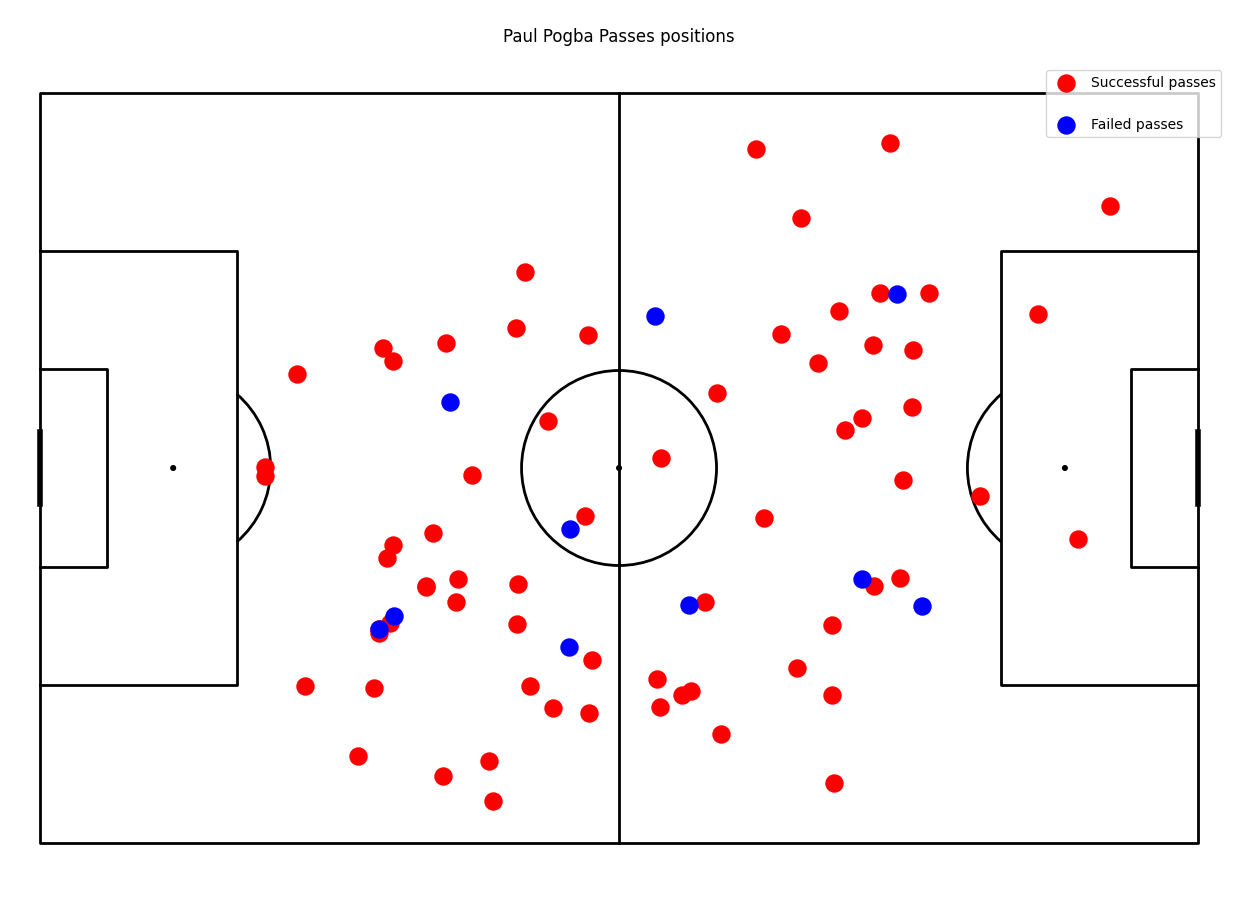

In [ ]:
pitch = Pitch(line_color='black', pitch_type = 'opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(pogba[pogba['description'] == 'Successful Pass']['x'],pogba[pogba['description'] == 'Successful Pass']['y'], color = 'red',ax=ax['pitch'],alpha = 1, s = 150, label = 'Successful passes')
pitch.scatter(pogba[pogba['description'] == 'Failed Pass']['x'],pogba[pogba['description'] == 'Failed Pass']['y'], color = 'blue',ax=ax['pitch'],alpha = 1, s = 150, label = 'Failed passes')
# No free kicks taken
fig.suptitle('Paul Pogba Passes positions')
ax['pitch'].legend(labelspacing=2)
plt.show()

In [ ]:
df_qual = pd.DataFrame(pogba['qualifiers'].tolist())
df_qual

,0,1,2,3,4,5,6,7,8,9
0,{'qualifierId': 178},"{'qualifierId': 212, 'value': '15.6'}","{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 140, 'value': '36.6'}","{'qualifierId': 141, 'value': '9.2'}","{'qualifierId': 213, 'value': '4.8'}",None,None,None,None
1,"{'qualifierId': 56, 'value': 'Back'}",{'qualifierId': 178},"{'qualifierId': 213, 'value': '1.8'}","{'qualifierId': 141, 'value': '86.2'}","{'qualifierId': 140, 'value': '26.0'}","{'qualifierId': 212, 'value': '14.2'}",None,None,None,None
2,"{'qualifierId': 213, 'value': '4.7'}","{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 140, 'value': '23.0'}","{'qualifierId': 212, 'value': '23.3'}",{'qualifierId': 178},"{'qualifierId': 141, 'value': '28.3'}",None,None,None,None
3,{'qualifierId': 178},"{'qualifierId': 213, 'value': '1.6'}","{'qualifierId': 212, 'value': '10.1'}","{'qualifierId': 141, 'value': '82.6'}","{'qualifierId': 140, 'value': '46.6'}","{'qualifierId': 56, 'value': 'Back'}",None,None,None,None
4,"{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 140, 'value': '39.2'}",{'qualifierId': 178},"{'qualifierId': 212, 'value': '9.3'}","{'qualifierId': 213, 'value': '4.4'}","{'qualifierId': 141, 'value': '63.1'}",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
72,"{'qualifierId': 141, 'value': '0.0'}",{'qualifierId': 178},"{'qualifierId': 213, 'value': '5.5'}",{'qualifierId': 155},"{'qualifierId': 140, 'value': '62.0'}","{'qualifierId': 212, 'value': '25.3'}","{'qualifierId': 56, 'value': 'Right'}",None,None,None
73,"{'qualifierId': 213, 'value': '4.6'}","{'qualifierId': 141, 'value': '30.4'}","{'qualifierId': 56, 'value': 'Center'}","{'qualifierId': 212, 'value': '22.9'}","{'qualifierId': 140, 'value': '65.3'}",{'qualifierId': 178},None,None,None,None
74,"{'qualifierId': 212, 'value': '11.8'}",{'qualifierId': 178},"{'qualifierId': 140, 'value': '75.8'}","{'qualifierId': 213, 'value': '5.4'}","{'qualifierId': 141, 'value': '6.7'}","{'qualifierId': 56, 'value': 'Right'}",None,None,None,None
75,"{'qualifierId': 56, 'value': 'Right'}","{'qualifierId': 140, 'value': '72.7'}","{'qualifierId': 212, 'value': '9.4'}","{'qualifierId': 141, 'value': '17.0'}","{'qualifierId': 213, 'value': '5.2'}",{'qualifierId': 178},None,None,None,None


In [ ]:
data_qual = []
for i in range (len(df_qual)):
  for j in range (len(df_qual.columns)):
    data_qual.append(df_qual.iloc[i][j])

data_qual = [event for event in data_qual if event is not None]
data_qual

In [ ]:
qualifier_data = pd.DataFrame(data_qual, columns = ['qualifierId','value'])
qualifier_data

,qualifierId,value
0,178,NaN
1,212,15.6
2,56,Back
3,140,36.6
4,141,9.2
...,...,...
491,178,NaN
492,140,86.6
493,141,42.8
494,56,Center


In [ ]:
qualifier_data['qualifierId'].value_counts()

212    77
56     77
140    77
141    77
213    77
178    71
1       8
155     7
3       7
388     6
189     3
210     2
154     2
168     1
20      1
2       1
223     1
196     1
Name: qualifierId, dtype: int64

In [ ]:
qualifier = []
outcome = []
x = []
y = []

for i in range (len(pogba)):
  qualifier.append(len(pogba['qualifiers'].iloc[i]))

result_qualifier = [x for x, n in zip(pogba['eventId'], qualifier) for _ in range(n)]
result_qualifier = pd.DataFrame({'eventId': result_qualifier})
result_qualifier = result_qualifier.reset_index()

result_outcome = [x for x, n in zip(pogba['outcome'], qualifier) for _ in range(n)]
result_outcome = pd.DataFrame({'outcome': result_outcome})
result_outcome = result_outcome.reset_index()

result_x = [x for x, n in zip(pogba['x'], qualifier) for _ in range(n)]
result_x = pd.DataFrame({'x': result_x})
result_x = result_x.reset_index()

result_y = [x for x, n in zip(pogba['y'], qualifier) for _ in range(n)]
result_y = pd.DataFrame({'y': result_y})
result_y = result_y.reset_index()

In [ ]:
qualifier_data = pd.concat([qualifier_data,result_qualifier['eventId']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_outcome['outcome']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_x['x']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_y['y']], axis = 1)
qualifier_data

,qualifierId,value,eventId,outcome,x,y
0,178,NaN,2253488529,True,35.9,32.1
1,212,15.6,2253488529,True,35.9,32.1
2,56,Back,2253488529,True,35.9,32.1
3,140,36.6,2253488529,True,35.9,32.1
4,141,9.2,2253488529,True,35.9,32.1
...,...,...,...,...,...,...
491,178,NaN,2253524365,True,74.3,35.4
492,140,86.6,2253524365,True,74.3,35.4
493,141,42.8,2253524365,True,74.3,35.4
494,56,Center,2253524365,True,74.3,35.4


In [ ]:
qualifier_data[(qualifier_data['outcome'] == True) & ((qualifier_data['qualifierId'] == 140) | (qualifier_data['qualifierId'] == 141))]

,qualifierId,value,eventId,outcome,x,y
3,140,36.6,2253488529,True,35.9,32.1
4,141,9.2,2253488529,True,35.9,32.1
9,141,86.2,2253489769,True,29.6,66.0
10,140,26.0,2253489769,True,29.6,66.0
14,140,23.0,2253489921,True,22.2,62.6
...,...,...,...,...,...,...
480,141,6.7,2253524323,True,68.4,19.8
483,140,72.7,2253524331,True,68.4,29.1
485,141,17.0,2253524331,True,68.4,29.1
492,140,86.6,2253524365,True,74.3,35.4


In [ ]:
pivoted_df = qualifier_data.pivot(index=['eventId', 'outcome', 'x', 'y'], columns='qualifierId', values='value').reset_index()
pivoted_df.columns.name = None  # Remove the columns' name

# Rename the columns if needed
pivoted_df = pivoted_df.rename(columns={140: 'x_end', 141: 'y_end', 212: 'travel_dist', 56: 'pos_touch'})

qualifier_data = pivoted_df
qualifier_data = qualifier_data.loc[:, ['eventId', 'outcome', 'x', 'y','x_end','y_end','travel_dist','pos_touch']]
qualifier_data

,eventId,outcome,x,y,x_end,y_end,travel_dist,pos_touch
0,2253488529,True,35.9,32.1,36.6,9.2,15.6,Back
1,2253489769,True,29.6,66.0,26.0,86.2,14.2,Back
2,2253489921,True,22.2,62.6,23.0,28.3,23.3,Back
3,2253490283,True,47.3,67.8,46.6,82.6,10.1,Back
4,2253490369,True,41.9,76.1,39.2,63.1,9.3,Back
...,...,...,...,...,...,...,...,...
72,2253524323,True,68.4,19.8,75.8,6.7,11.8,Right
73,2253524331,True,68.4,29.1,72.7,17.0,9.4,Right
74,2253524365,True,74.3,35.4,86.6,42.8,13.9,Center
75,2253545273,False,56.0,31.7,76.7,32.6,21.7,Center


In [ ]:
qualifier_data['x'] = qualifier_data['x'].round().astype(int)
qualifier_data['y'] = qualifier_data['y'].round().astype(int)
qualifier_data['x_end'] = qualifier_data['x_end'].astype(float)
qualifier_data['y_end'] = qualifier_data['y_end'].astype(float)
qualifier_data['x_end'] = qualifier_data['x_end'].round().astype(int)
qualifier_data['y_end'] = qualifier_data['y_end'].round().astype(int)

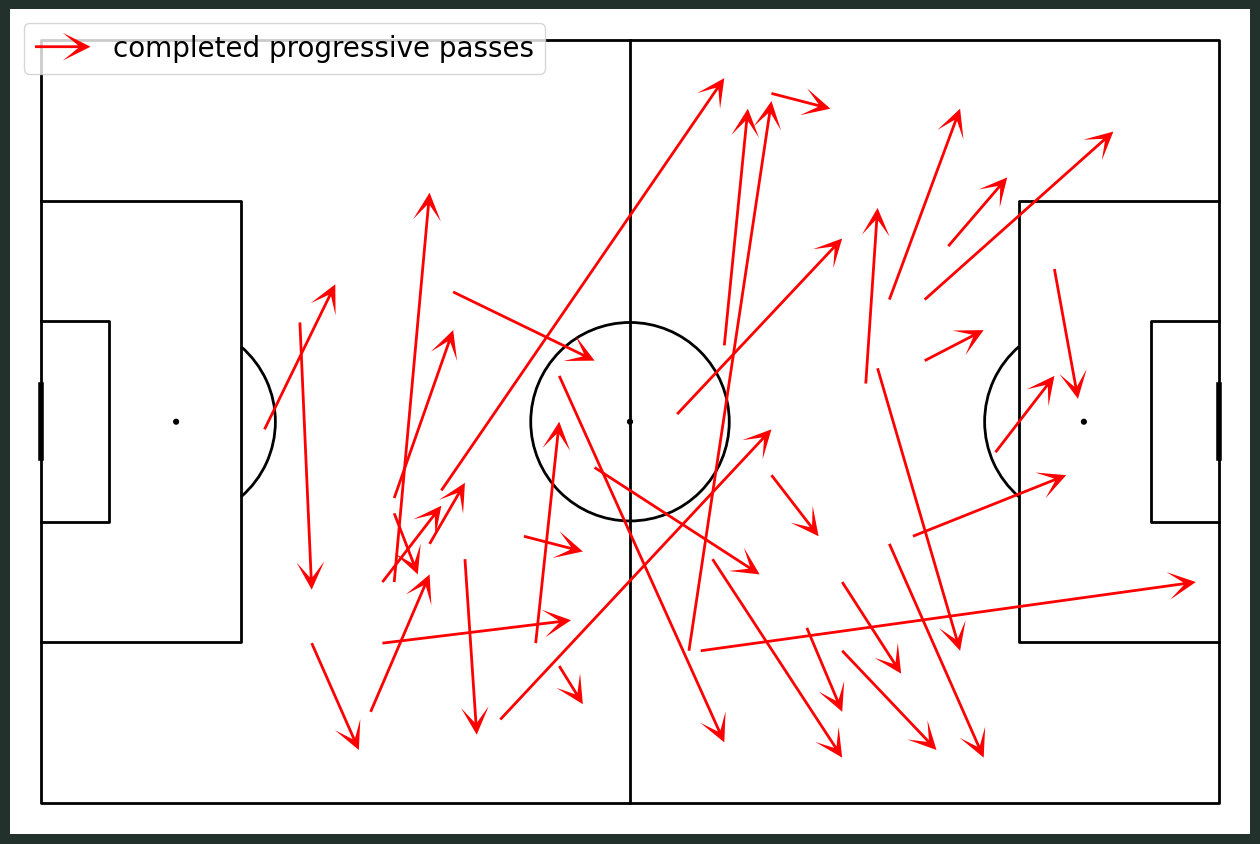

In [ ]:
# Set up the pitch
pitch = Pitch(pitch_type='opta', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] > qualifier_data['x'])]['x'],qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] > qualifier_data['x'])]['y'],
             qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] > qualifier_data['x'])]['x_end'], qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] > qualifier_data['x'])]['y_end'], width=2,
             headwidth=10, headlength=10, color='red', ax=ax, label='completed progressive passes')
ax.legend( fontsize=20, loc='upper left')


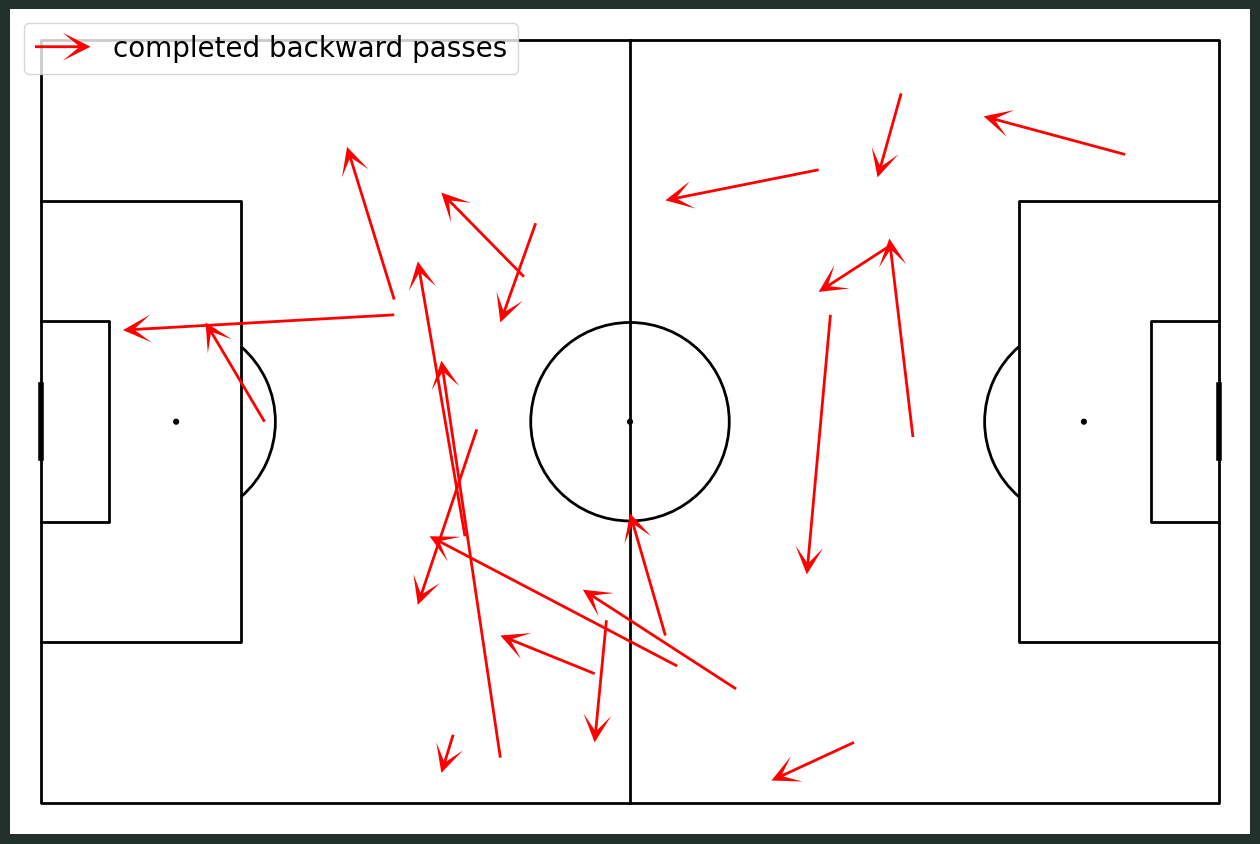

In [ ]:
# Set up the pitch
pitch = Pitch(pitch_type='opta', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] < qualifier_data['x'])]['x'],qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] < qualifier_data['x'])]['y'],
             qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] < qualifier_data['x'])]['x_end'], qualifier_data[(qualifier_data['outcome'] == True) & (qualifier_data['x_end'] < qualifier_data['x'])]['y_end'], width=2,
             headwidth=10, headlength=10, color='red', ax=ax, label='completed backward passes')
ax.legend( fontsize=20, loc='upper left')

In [ ]:
success_united = ManUnited_passes[ManUnited_passes['description'] == 'Successful Pass']
success_united

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass
18,2253536575,1,True,1,19,1,148225,2021-01-12T20:18:07.397,"[{'qualifierId': 141, 'value': '74.1'}, {'qual...",40.2,65.1,Successful Pass
19,2253488431,1,True,1,25,1,106760,2021-01-12T20:18:13.364,"[{'qualifierId': 212, 'value': '15.9'}, {'qual...",32.9,90.9,Successful Pass
22,2253488529,1,True,1,37,1,74208,2021-01-12T20:18:25.946,"[{'qualifierId': 178}, {'qualifierId': 212, 'v...",35.9,32.1,Successful Pass
23,2253488559,1,True,1,39,1,214590,2021-01-12T20:18:27.959,"[{'qualifierId': 140, 'value': '44.5'}, {'qual...",36.6,9.2,Successful Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2253524365,1,True,81,36,1,74208,2021-01-12T21:57:41.432,"[{'qualifierId': 212, 'value': '13.9'}, {'qual...",74.3,35.4,Successful Pass
1196,2253524499,1,True,83,8,1,148225,2021-01-12T21:59:12.904,"[{'qualifierId': 140, 'value': '89.7'}, {'qual...",76.4,67.3,Successful Pass
1229,2253524823,1,True,84,58,1,51940,2021-01-12T22:01:03.755,"[{'qualifierId': 213, 'value': '0.3'}, {'quali...",4.7,49.4,Successful Pass
1300,2253526011,1,True,92,53,1,195851,2021-01-12T22:08:58.085,"[{'qualifierId': 212, 'value': '44.5'}, {'qual...",33.4,30.4,Successful Pass


In [ ]:
df_qual = pd.DataFrame(success_united['qualifiers'].tolist())
df_qual

,0,1,2,3,4,5,6,7,8,9,10,11
0,"{'qualifierId': 140, 'value': '42.2'}","{'qualifierId': 141, 'value': '30.9'}",{'qualifierId': 74},"{'qualifierId': 213, 'value': '6.0'}","{'qualifierId': 212, 'value': '41.3'}",{'qualifierId': 155},{'qualifierId': 1},"{'qualifierId': 56, 'value': 'Back'}",{'qualifierId': 124},None,None,None
1,"{'qualifierId': 141, 'value': '74.1'}","{'qualifierId': 212, 'value': '11.3'}","{'qualifierId': 140, 'value': '31.1'}","{'qualifierId': 213, 'value': '2.6'}",{'qualifierId': 178},"{'qualifierId': 56, 'value': 'Back'}",None,None,None,None,None,None
2,"{'qualifierId': 212, 'value': '15.9'}","{'qualifierId': 213, 'value': '3.4'}",{'qualifierId': 178},"{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 141, 'value': '85.0'}","{'qualifierId': 140, 'value': '18.2'}",None,None,None,None,None,None
3,{'qualifierId': 178},"{'qualifierId': 212, 'value': '15.6'}","{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 140, 'value': '36.6'}","{'qualifierId': 141, 'value': '9.2'}","{'qualifierId': 213, 'value': '4.8'}",None,None,None,None,None,None
4,"{'qualifierId': 140, 'value': '44.5'}","{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 141, 'value': '4.1'}","{'qualifierId': 212, 'value': '9.0'}","{'qualifierId': 213, 'value': '5.9'}",{'qualifierId': 178},None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
465,"{'qualifierId': 212, 'value': '13.9'}",{'qualifierId': 210},{'qualifierId': 154},{'qualifierId': 178},"{'qualifierId': 140, 'value': '86.6'}","{'qualifierId': 141, 'value': '42.8'}","{'qualifierId': 56, 'value': 'Center'}","{'qualifierId': 213, 'value': '0.4'}",None,None,None,None
466,"{'qualifierId': 140, 'value': '89.7'}",{'qualifierId': 178},"{'qualifierId': 213, 'value': '0.6'}","{'qualifierId': 56, 'value': 'Left'}","{'qualifierId': 212, 'value': '16.6'}","{'qualifierId': 141, 'value': '80.6'}",None,None,None,None,None,None
467,"{'qualifierId': 213, 'value': '0.3'}","{'qualifierId': 141, 'value': '72.0'}","{'qualifierId': 56, 'value': 'Center'}","{'qualifierId': 140, 'value': '55.7'}",{'qualifierId': 74},{'qualifierId': 124},"{'qualifierId': 212, 'value': '55.7'}",{'qualifierId': 1},None,None,None,None
468,"{'qualifierId': 212, 'value': '44.5'}","{'qualifierId': 213, 'value': '0.6'}","{'qualifierId': 56, 'value': 'Center'}","{'qualifierId': 141, 'value': '67.3'}",{'qualifierId': 155},"{'qualifierId': 140, 'value': '68.4'}",{'qualifierId': 178},{'qualifierId': 1},None,None,None,None


In [ ]:
data_qual = []
for i in range (len(df_qual)):
  for j in range (len(df_qual.columns)):
    data_qual.append(df_qual.iloc[i][j])

data_qual = [event for event in data_qual if event is not None]
data_qual

In [ ]:
qualifier_data = pd.DataFrame(data_qual, columns = ['qualifierId','value'])
qualifier_data

,qualifierId,value
0,140,42.2
1,141,30.9
2,74,NaN
3,213,6.0
4,212,41.3
...,...,...
2944,56,Center
2945,213,5.5
2946,210,NaN
2947,178,NaN


In [ ]:
qualifier = []
outcome = []
x = []
y = []

for i in range (len(success_united)):
  qualifier.append(len(success_united['qualifiers'].iloc[i]))

result_qualifier = [x for x, n in zip(success_united['eventId'], qualifier) for _ in range(n)]
result_qualifier = pd.DataFrame({'eventId': result_qualifier})
result_qualifier = result_qualifier.reset_index()

result_outcome = [x for x, n in zip(success_united['outcome'], qualifier) for _ in range(n)]
result_outcome = pd.DataFrame({'outcome': result_outcome})
result_outcome = result_outcome.reset_index()

result_x = [x for x, n in zip(success_united['x'], qualifier) for _ in range(n)]
result_x = pd.DataFrame({'x': result_x})
result_x = result_x.reset_index()

result_y = [x for x, n in zip(success_united['y'], qualifier) for _ in range(n)]
result_y = pd.DataFrame({'y': result_y})
result_y = result_y.reset_index()

result_playerId = [x for x, n in zip(success_united['playerId'], qualifier) for _ in range(n)]
result_playerId = pd.DataFrame({'playerId': result_playerId})
result_playerId = result_playerId.reset_index()

In [ ]:
qualifier_data = pd.concat([qualifier_data,result_qualifier['eventId']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_outcome['outcome']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_x['x']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_y['y']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_playerId['playerId']], axis = 1)
qualifier_data

,qualifierId,value,eventId,outcome,x,y,playerId
0,140,42.2,2253488053,True,4.8,49.6,51940
1,141,30.9,2253488053,True,4.8,49.6,51940
2,74,NaN,2253488053,True,4.8,49.6,51940
3,213,6.0,2253488053,True,4.8,49.6,51940
4,212,41.3,2253488053,True,4.8,49.6,51940
...,...,...,...,...,...,...,...
2944,56,Center,2253526013,True,68.4,67.3,40720
2945,213,5.5,2253526013,True,68.4,67.3,40720
2946,210,NaN,2253526013,True,68.4,67.3,40720
2947,178,NaN,2253526013,True,68.4,67.3,40720


In [ ]:
pivoted_df = qualifier_data.pivot(index=['eventId', 'outcome', 'x', 'y','playerId'], columns='qualifierId', values='value').reset_index()
pivoted_df.columns.name = None  # Remove the columns' name

# Rename the columns if needed
pivoted_df = pivoted_df.rename(columns={140: 'x_end', 141: 'y_end', 212: 'travel_dist', 56: 'pos_touch'})

qualifier_data = pivoted_df
qualifier_data = qualifier_data.loc[:, ['eventId', 'outcome', 'x', 'y','playerId','x_end','y_end','travel_dist','pos_touch']]
qualifier_data

,eventId,outcome,x,y,playerId,x_end,y_end,travel_dist,pos_touch
0,2253488053,True,4.8,49.6,51940,42.2,30.9,41.3,Back
1,2253488431,True,32.9,90.9,106760,18.2,85.0,15.9,Back
2,2253488529,True,35.9,32.1,74208,36.6,9.2,15.6,Back
3,2253488559,True,36.6,9.2,214590,44.5,4.1,9.0,Back
4,2253488685,True,41.2,5.5,214590,24.1,23.0,21.5,Back
...,...,...,...,...,...,...,...,...,...
465,2253547807,True,37.6,21.9,197365,32.7,43.5,15.6,Back
466,2253548043,True,37.4,6.6,62398,43.8,3.8,7.0,Back
467,2253548053,True,43.8,3.8,214590,39.6,34.0,21.0,Back
468,2253548057,True,38.6,35.2,141746,36.5,68.0,22.4,Back


In [ ]:
qualifier_data['x'] = qualifier_data['x'].round().astype(int)
qualifier_data['y'] = qualifier_data['y'].round().astype(int)
qualifier_data['playerId'] = qualifier_data['playerId'].astype(int)
qualifier_data['x_end'] = qualifier_data['x_end'].astype(float)
qualifier_data['y_end'] = qualifier_data['y_end'].astype(float)
qualifier_data['x_end'] = qualifier_data['x_end'].round().astype(int)
qualifier_data['y_end'] = qualifier_data['y_end'].round().astype(int)
qualifier_data['travel_dist'] = qualifier_data['travel_dist'].astype(float)

<Axes: >

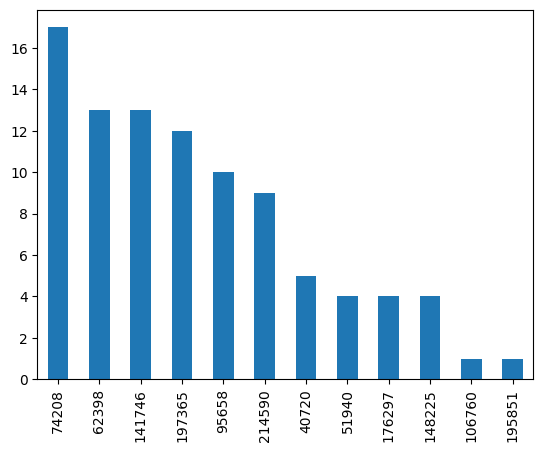

In [ ]:
long_passes = qualifier_data[((qualifier_data['x_end'] - qualifier_data['x'] > 20) | (qualifier_data['y_end'] - qualifier_data['y'] >20))]
long_passes['playerId'].value_counts().plot(kind = 'bar')

<Axes: >

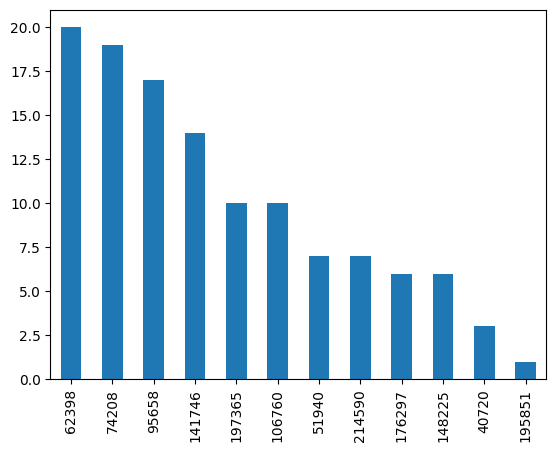

In [ ]:
long_passes = qualifier_data[qualifier_data['travel_dist'] > 20]
long_passes['playerId'].value_counts().plot(kind = 'bar')

In [ ]:
success_burnley = burnley_passes[burnley_passes['description'] == 'Successful Pass']
success_burnley

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
1,2253487639,1,True,0,2,90,17761,2021-01-12T20:16:50.991,"[{'qualifierId': 178}, {'qualifierId': 213, 'v...",29.6,53.4,Successful Pass
2,2253487685,1,True,0,7,90,68983,2021-01-12T20:16:55.444,"[{'qualifierId': 1}, {'qualifierId': 213, 'val...",41.3,18.4,Successful Pass
37,2253489179,1,True,2,37,90,172782,2021-01-12T20:19:25.918,"[{'qualifierId': 140, 'value': '54.0'}, {'qual...",50.8,41.3,Successful Pass
46,2253489487,1,True,3,4,90,17761,2021-01-12T20:19:52.638,"[{'qualifierId': 212, 'value': '49.0'}, {'qual...",87.5,5.0,Successful Pass
49,2253489561,1,True,3,11,90,172782,2021-01-12T20:19:59.474,"[{'qualifierId': 178}, {'qualifierId': 141, 'v...",35.5,72.8,Successful Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2253526063,1,True,93,22,90,60551,2021-01-12T22:09:27.288,"[{'qualifierId': 141, 'value': '3.7'}, {'quali...",36.3,33.7,Successful Pass
1316,2253526187,1,True,94,50,90,172782,2021-01-12T22:10:55.13,"[{'qualifierId': 56, 'value': 'Right'}, {'qual...",64.6,23.0,Successful Pass
1321,2253526307,1,True,96,9,90,17761,2021-01-12T22:12:14.092,"[{'qualifierId': 212, 'value': '16.0'}, {'qual...",53.7,9.2,Successful Pass
1323,2253526361,1,True,96,49,90,17761,2021-01-12T22:12:54.437,"[{'qualifierId': 213, 'value': '0.8'}, {'quali...",22.6,5.9,Successful Pass


In [ ]:
df_qual = pd.DataFrame(success_burnley['qualifiers'].tolist())
df_qual

,0,1,2,3,4,5,6,7,8
0,{'qualifierId': 178},"{'qualifierId': 213, 'value': '5.0'}","{'qualifierId': 212, 'value': '21.7'}","{'qualifierId': 141, 'value': '23.3'}","{'qualifierId': 140, 'value': '36.4'}","{'qualifierId': 56, 'value': 'Back'}",None,None,None
1,{'qualifierId': 1},"{'qualifierId': 213, 'value': '0.7'}","{'qualifierId': 56, 'value': 'Center'}",{'qualifierId': 178},"{'qualifierId': 141, 'value': '73.1'}",{'qualifierId': 210},{'qualifierId': 155},"{'qualifierId': 140, 'value': '86.0'}","{'qualifierId': 212, 'value': '59.9'}"
2,"{'qualifierId': 140, 'value': '54.0'}","{'qualifierId': 141, 'value': '45.4'}","{'qualifierId': 56, 'value': 'Center'}",{'qualifierId': 3},{'qualifierId': 388},"{'qualifierId': 213, 'value': '5.2'}","{'qualifierId': 212, 'value': '10.4'}",None,None
3,"{'qualifierId': 212, 'value': '49.0'}",{'qualifierId': 157},"{'qualifierId': 140, 'value': '58.3'}","{'qualifierId': 141, 'value': '81.2'}",{'qualifierId': 178},"{'qualifierId': 213, 'value': '6.1'}",{'qualifierId': 1},"{'qualifierId': 56, 'value': 'Left'}",None
4,{'qualifierId': 178},"{'qualifierId': 141, 'value': '54.0'}","{'qualifierId': 212, 'value': '12.8'}","{'qualifierId': 213, 'value': '4.7'}","{'qualifierId': 56, 'value': 'Back'}","{'qualifierId': 140, 'value': '35.6'}",None,None,None
...,...,...,...,...,...,...,...,...,...
210,"{'qualifierId': 141, 'value': '3.7'}","{'qualifierId': 56, 'value': 'Right'}",{'qualifierId': 1},{'qualifierId': 178},"{'qualifierId': 212, 'value': '34.3'}","{'qualifierId': 213, 'value': '5.6'}","{'qualifierId': 140, 'value': '62.6'}",None,None
211,"{'qualifierId': 56, 'value': 'Right'}","{'qualifierId': 212, 'value': '16.0'}","{'qualifierId': 140, 'value': '71.8'}","{'qualifierId': 213, 'value': '5.2'}","{'qualifierId': 141, 'value': '2.3'}",{'qualifierId': 178},None,None,None
212,"{'qualifierId': 212, 'value': '16.0'}","{'qualifierId': 141, 'value': '17.9'}",{'qualifierId': 3},{'qualifierId': 388},"{'qualifierId': 56, 'value': 'Right'}","{'qualifierId': 140, 'value': '67.9'}","{'qualifierId': 213, 'value': '0.4'}",None,None
213,"{'qualifierId': 213, 'value': '0.8'}","{'qualifierId': 141, 'value': '20.8'}","{'qualifierId': 212, 'value': '13.6'}",{'qualifierId': 388},"{'qualifierId': 140, 'value': '31.2'}","{'qualifierId': 56, 'value': 'Back'}",{'qualifierId': 3},None,None


In [ ]:
data_qual = []
for i in range (len(df_qual)):
  for j in range (len(df_qual.columns)):
    data_qual.append(df_qual.iloc[i][j])

data_qual = [event for event in data_qual if event is not None]
data_qual

In [ ]:
qualifier_data = pd.DataFrame(data_qual, columns = ['qualifierId','value'])
qualifier_data

,qualifierId,value
0,178,NaN
1,213,5.0
2,212,21.7
3,141,23.3
4,140,36.4
...,...,...
1385,178,NaN
1386,140,17.4
1387,213,4.2
1388,56,Back


In [ ]:
qualifier = []
outcome = []
x = []
y = []

for i in range (len(success_burnley)):
  qualifier.append(len(success_burnley['qualifiers'].iloc[i]))

result_qualifier = [x for x, n in zip(success_burnley['eventId'], qualifier) for _ in range(n)]
result_qualifier = pd.DataFrame({'eventId': result_qualifier})
result_qualifier = result_qualifier.reset_index()

result_outcome = [x for x, n in zip(success_burnley['outcome'], qualifier) for _ in range(n)]
result_outcome = pd.DataFrame({'outcome': result_outcome})
result_outcome = result_outcome.reset_index()

result_x = [x for x, n in zip(success_burnley['x'], qualifier) for _ in range(n)]
result_x = pd.DataFrame({'x': result_x})
result_x = result_x.reset_index()

result_y = [x for x, n in zip(success_burnley['y'], qualifier) for _ in range(n)]
result_y = pd.DataFrame({'y': result_y})
result_y = result_y.reset_index()

result_playerId = [x for x, n in zip(success_burnley['playerId'], qualifier) for _ in range(n)]
result_playerId = pd.DataFrame({'playerId': result_playerId})
result_playerId = result_playerId.reset_index()

In [ ]:
qualifier_data = pd.concat([qualifier_data,result_qualifier['eventId']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_outcome['outcome']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_x['x']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_y['y']], axis = 1)
qualifier_data = pd.concat([qualifier_data,result_playerId['playerId']], axis = 1)
qualifier_data

,qualifierId,value,eventId,outcome,x,y,playerId
0,178,NaN,2253487639,True,29.6,53.4,17761
1,213,5.0,2253487639,True,29.6,53.4,17761
2,212,21.7,2253487639,True,29.6,53.4,17761
3,141,23.3,2253487639,True,29.6,53.4,17761
4,140,36.4,2253487639,True,29.6,53.4,17761
...,...,...,...,...,...,...,...
1385,178,NaN,2253526369,True,20.8,13.7,60551
1386,140,17.4,2253526369,True,20.8,13.7,60551
1387,213,4.2,2253526369,True,20.8,13.7,60551
1388,56,Back,2253526369,True,20.8,13.7,60551


In [ ]:
pivoted_df = qualifier_data.pivot(index=['eventId', 'outcome', 'x', 'y','playerId'], columns='qualifierId', values='value').reset_index()
pivoted_df.columns.name = None  # Remove the columns' name

# Rename the columns if needed
pivoted_df = pivoted_df.rename(columns={140: 'x_end', 141: 'y_end', 212: 'travel_dist', 56: 'pos_touch'})

qualifier_data = pivoted_df
qualifier_data = qualifier_data.loc[:, ['eventId', 'outcome', 'x', 'y','playerId','x_end','y_end','travel_dist','pos_touch']]
qualifier_data

,eventId,outcome,x,y,playerId,x_end,y_end,travel_dist,pos_touch
0,2253487639,True,29.6,53.4,17761,36.4,23.3,21.7,Back
1,2253487685,True,41.3,18.4,68983,86.0,73.1,59.9,Center
2,2253489179,True,50.8,41.3,172782,54.0,45.4,10.4,Center
3,2253489487,True,87.5,5.0,17761,58.3,81.2,49.0,Left
4,2253489561,True,35.5,72.8,172782,35.6,54.0,12.8,Back
...,...,...,...,...,...,...,...,...,...
210,2253546811,True,28.7,45.0,17761,33.9,83.0,26.4,Back
211,2253546891,True,23.7,86.7,39487,32.9,96.5,11.7,Back
212,2253547225,True,46.8,94.5,433154,37.8,98.3,9.8,Back
213,2253547243,True,37.4,96.0,39487,23.9,91.6,14.5,Back


In [ ]:
qualifier_data['x'] = qualifier_data['x'].round().astype(int)
qualifier_data['y'] = qualifier_data['y'].round().astype(int)
qualifier_data['playerId'] = qualifier_data['playerId'].astype(int)
qualifier_data['x_end'] = qualifier_data['x_end'].astype(float)
qualifier_data['y_end'] = qualifier_data['y_end'].astype(float)
qualifier_data['x_end'] = qualifier_data['x_end'].round().astype(int)
qualifier_data['y_end'] = qualifier_data['y_end'].round().astype(int)
qualifier_data['travel_dist'] = qualifier_data['travel_dist'].astype(float)

<Axes: >

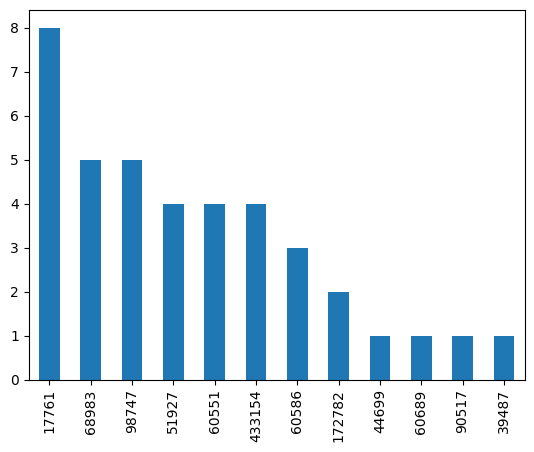

In [ ]:
long_passes = qualifier_data[((qualifier_data['x_end'] - qualifier_data['x'] > 20) | (qualifier_data['y_end'] - qualifier_data['y'] >20))]
long_passes['playerId'].value_counts().plot(kind = 'bar')

<Axes: >

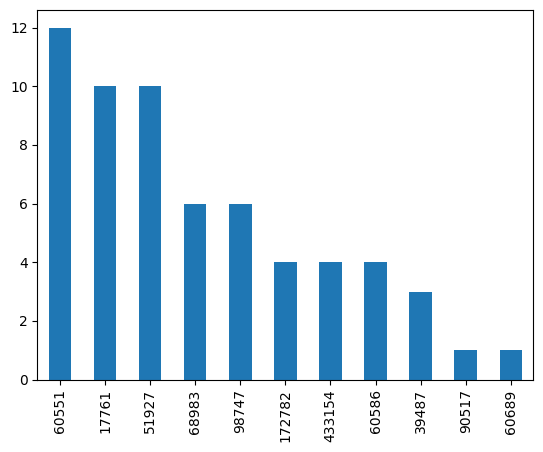

In [ ]:
long_passes = qualifier_data[qualifier_data['travel_dist'] > 20]
long_passes['playerId'].value_counts().plot(kind = 'bar')

In [ ]:
ManUnited

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass
5,2253488059,1,False,0,47,1,141746,2021-01-12T20:17:35.534,"[{'qualifierId': 140, 'value': '37.6'}, {'qual...",42.2,30.9,Failed Pass
7,2253488071,61,True,0,48,1,74208,2021-01-12T20:17:36.787,"[{'qualifierId': 178}, {'qualifierId': 56, 'va...",38.5,27.6,Unintentional Ball Touch
9,2253488085,61,True,0,50,1,74208,2021-01-12T20:17:38.791,"[{'qualifierId': 21}, {'qualifierId': 56, 'val...",38.5,24.0,Unintentional Ball Touch
11,2253488123,7,True,0,52,1,62398,2021-01-12T20:17:40.598,"[{'qualifierId': 233, 'value': '1000013'}, {'q...",34.8,14.9,Tackle and Possession
...,...,...,...,...,...,...,...,...,...,...,...,...
1318,2253526199,12,True,94,55,1,195851,2021-01-12T22:11:00.09,"[{'qualifierId': 56, 'value': 'Back'}, {'quali...",90.8,54.0,Clearance
1320,2253526305,1,False,96,6,1,51940,2021-01-12T22:12:11.116,"[{'qualifierId': 74}, {'qualifierId': 56, 'val...",4.5,51.0,Failed Pass
1322,2253526357,1,False,96,47,1,95658,2021-01-12T22:12:51.862,"[{'qualifierId': 1}, {'qualifierId': 213, 'val...",63.2,17.6,Free Kick Taken
1326,2253526373,61,True,96,54,1,40720,2021-01-12T22:12:58.959,"[{'qualifierId': 56, 'value': 'Left'}, {'quali...",22.3,14.0,Unintentional Ball Touch


In [ ]:
mean_place_united = ManUnited[['x','y','playerId']]
mean_place_united['playerId'] = mean_place_united['playerId'].astype(int)
mean_place_united = mean_place_united[(mean_place_united['playerId'] != -1) & (mean_place_united['playerId'] != 195851) & (mean_place_united['playerId'] != 220688)]
mean_place_united = mean_place_united.groupby(['playerId'])[['x', 'y']].mean().reset_index()
#mean_place = mean_place.reset_index()
mean_place

<ipython-input-55-de9d820c6463>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_place_united['playerId'] = mean_place_united['playerId'].astype(int)


,playerId,x,y
0,40720,62.213793,42.403448
1,51940,21.740741,52.414815
2,62398,48.125641,54.583333
3,74208,49.716514,42.469725
4,95658,42.225000,60.959211
5,106760,57.636471,77.047059
6,141746,61.322093,41.670930
7,148225,65.294231,70.584615
8,176297,66.704167,37.687500
9,197365,39.015068,40.935616


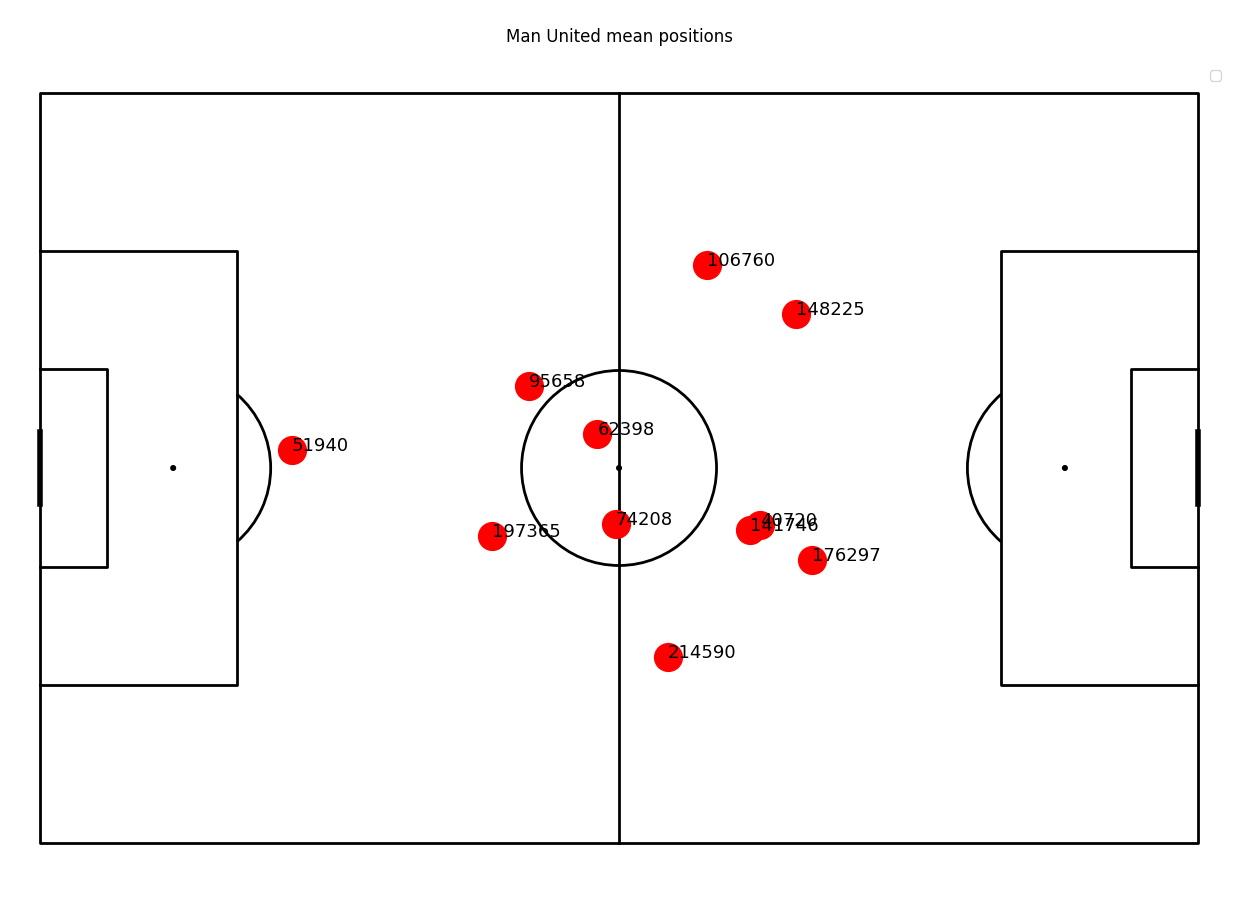

In [ ]:
#create pitch
pitch = Pitch(line_color='black', pitch_type = 'opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(mean_place_united['x'],mean_place_united['y'], color = 'red',ax=ax['pitch'],alpha = 1, s = 400)
for i, txt in enumerate(mean_place_united['playerId']):
    ax['pitch'].annotate(txt, (mean_place_united['x'][i], mean_place_united['y'][i]), fontsize=13)
fig.suptitle('Man United mean positions')
ax['pitch'].legend(labelspacing=2)
plt.show()

In [ ]:
mean_place_burnley = burnley[['x','y','playerId']]
mean_place_burnley['playerId'] = mean_place_burnley['playerId'].astype(int)
mean_place_burnley = mean_place_burnley[(mean_place_burnley['playerId'] != -1) & (mean_place_burnley['playerId'] != 433154) & (mean_place_burnley['playerId'] != 81183) & (mean_place_burnley['playerId'] != 44683)]
mean_place_burnley = mean_place_burnley.groupby(['playerId'])[['x', 'y']].mean().reset_index()
#mean_place = mean_place.reset_index()
mean_place_burnley

<ipython-input-57-e20b9b2ff736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_place_burnley['playerId'] = mean_place_burnley['playerId'].astype(int)


,playerId,x,y
0,17761,50.190000,44.547500
1,39487,48.587719,68.784211
2,44699,56.533333,47.969444
3,51927,41.842105,62.847368
4,60551,52.245283,48.515094
5,60586,53.856250,40.034375
6,60689,60.617647,54.664706
7,68983,54.808333,27.775000
8,90517,54.159459,62.543243
9,98747,31.364706,49.117647


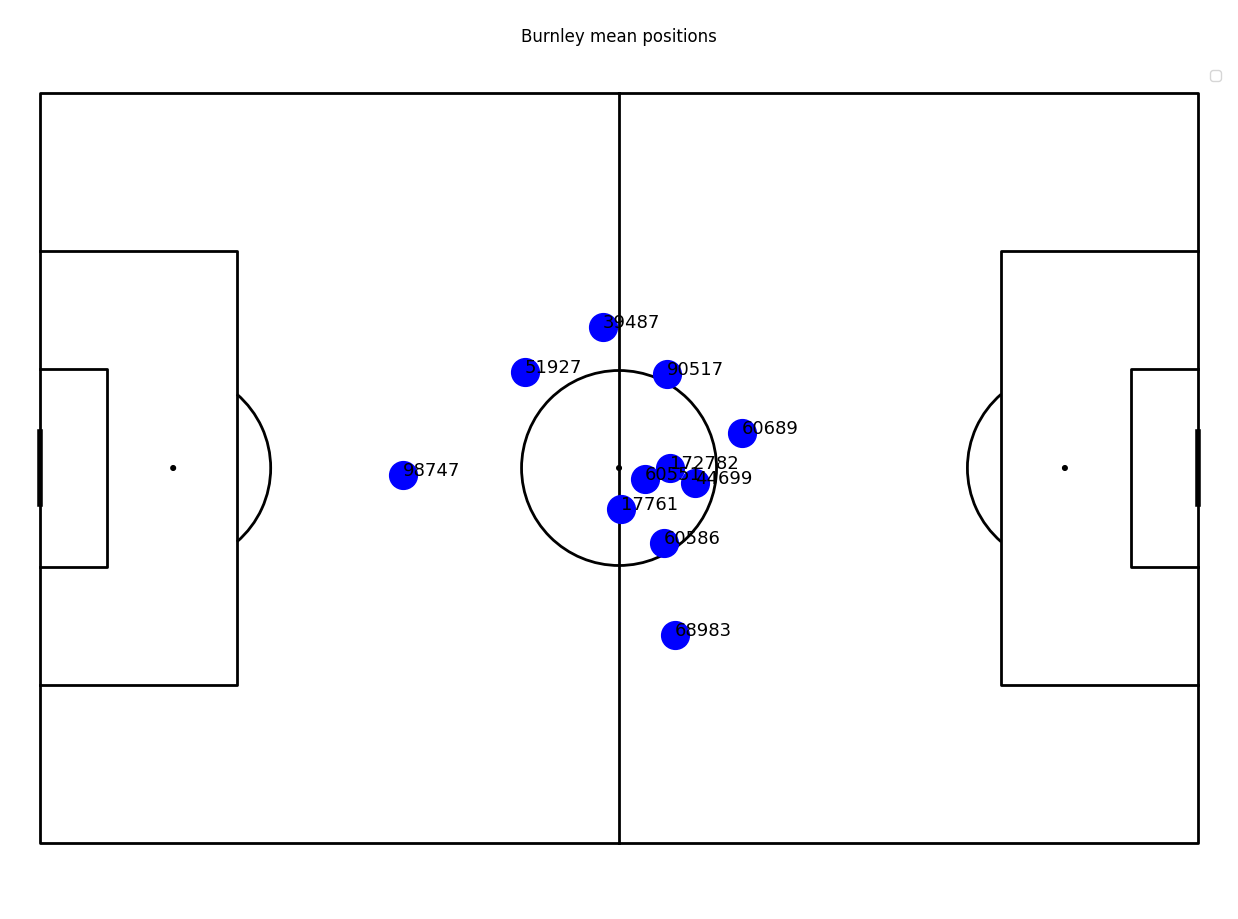

In [ ]:
#create pitch
pitch = Pitch(line_color='black', pitch_type = 'opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(mean_place_burnley['x'],mean_place_burnley['y'], color = 'blue',ax=ax['pitch'],alpha = 1, s = 400)
for i, txt in enumerate(mean_place_burnley['playerId']):
    ax['pitch'].annotate(txt, (mean_place_burnley['x'][i], mean_place_burnley['y'][i]), fontsize=13)
ax['pitch'].legend(labelspacing=2)
fig.suptitle('Burnley mean positions')

plt.show()

In [ ]:
ManUnited_passes.head(10)

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass
5,2253488059,1,False,0,47,1,141746,2021-01-12T20:17:35.534,"[{'qualifierId': 140, 'value': '37.6'}, {'qual...",42.2,30.9,Failed Pass
14,2253488303,1,False,1,9,1,197365,2021-01-12T20:17:57.766,"[{'qualifierId': 140, 'value': '42.4'}, {'qual...",17.6,9.2,Failed Pass
18,2253536575,1,True,1,19,1,148225,2021-01-12T20:18:07.397,"[{'qualifierId': 141, 'value': '74.1'}, {'qual...",40.2,65.1,Successful Pass
19,2253488431,1,True,1,25,1,106760,2021-01-12T20:18:13.364,"[{'qualifierId': 212, 'value': '15.9'}, {'qual...",32.9,90.9,Successful Pass
20,2253488445,1,False,1,28,1,95658,2021-01-12T20:18:16.949,"[{'qualifierId': 178}, {'qualifierId': 213, 'v...",22.0,88.9,Failed Pass
22,2253488529,1,True,1,37,1,74208,2021-01-12T20:18:25.946,"[{'qualifierId': 178}, {'qualifierId': 212, 'v...",35.9,32.1,Successful Pass
23,2253488559,1,True,1,39,1,214590,2021-01-12T20:18:27.959,"[{'qualifierId': 140, 'value': '44.5'}, {'qual...",36.6,9.2,Successful Pass
24,2253488561,1,False,1,41,1,176297,2021-01-12T20:18:29.65,"[{'qualifierId': 141, 'value': '2.9'}, {'quali...",45.3,3.1,Failed Pass
26,2253488655,1,True,1,47,1,141746,2021-01-12T20:18:35.14,"[{'qualifierId': 140, 'value': '41.2'}, {'qual...",60.4,0.0,Throw-in Taken


In [ ]:
ManUnited_passes['description'].value_counts()

Successful Pass    470
Failed Pass         99
Free Kick Taken     18
Throw-in Taken      14
Corner Taken         4
Kick-off             1
Name: description, dtype: int64

In [ ]:
receiver = []

for i in range(len(ManUnited_passes) - 1):
    if ((ManUnited_passes['description'].iloc[i] == 'Successful Pass')):
        receiver.append(ManUnited_passes['playerId'].iloc[i + 1])
    else:
        receiver.append(0)

receiver = pd.Series(receiver, name='receiver')
ManUnited_passes = ManUnited_passes.reset_index()
ManUnited_passes = pd.concat([ManUnited_passes,receiver], axis=1)
ManUnited_passes['receiver'] = ManUnited_passes['receiver'].fillna(0).astype(int)
ManUnited_passes




,index,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description,receiver
0,4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass,141746
1,5,2253488059,1,False,0,47,1,141746,2021-01-12T20:17:35.534,"[{'qualifierId': 140, 'value': '37.6'}, {'qual...",42.2,30.9,Failed Pass,0
2,14,2253488303,1,False,1,9,1,197365,2021-01-12T20:17:57.766,"[{'qualifierId': 140, 'value': '42.4'}, {'qual...",17.6,9.2,Failed Pass,0
3,18,2253536575,1,True,1,19,1,148225,2021-01-12T20:18:07.397,"[{'qualifierId': 141, 'value': '74.1'}, {'qual...",40.2,65.1,Successful Pass,106760
4,19,2253488431,1,True,1,25,1,106760,2021-01-12T20:18:13.364,"[{'qualifierId': 212, 'value': '15.9'}, {'qual...",32.9,90.9,Successful Pass,95658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,1301,2253526013,1,True,92,57,1,40720,2021-01-12T22:09:02.534,"[{'qualifierId': 155}, {'qualifierId': 212, 'v...",68.4,67.3,Successful Pass,106760
602,1314,2253526073,1,False,93,29,1,106760,2021-01-12T22:09:33.894,"[{'qualifierId': 56, 'value': 'Back'}, {'quali...",77.9,2.5,Failed Pass,0
603,1320,2253526305,1,False,96,6,1,51940,2021-01-12T22:12:11.116,"[{'qualifierId': 74}, {'qualifierId': 56, 'val...",4.5,51.0,Failed Pass,0
604,1322,2253526357,1,False,96,47,1,95658,2021-01-12T22:12:51.862,"[{'qualifierId': 1}, {'qualifierId': 213, 'val...",63.2,17.6,Free Kick Taken,0


In [ ]:
ManUnited_passes[ManUnited_passes['description'] == 'Successful Pass']

,level_0,index,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description,receiver,receiver
0,0,4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass,141746,141746
3,3,18,2253536575,1,True,1,19,1,148225,2021-01-12T20:18:07.397,"[{'qualifierId': 141, 'value': '74.1'}, {'qual...",40.2,65.1,Successful Pass,106760,106760
4,4,19,2253488431,1,True,1,25,1,106760,2021-01-12T20:18:13.364,"[{'qualifierId': 212, 'value': '15.9'}, {'qual...",32.9,90.9,Successful Pass,95658,95658
6,6,22,2253488529,1,True,1,37,1,74208,2021-01-12T20:18:25.946,"[{'qualifierId': 178}, {'qualifierId': 212, 'v...",35.9,32.1,Successful Pass,214590,214590
7,7,23,2253488559,1,True,1,39,1,214590,2021-01-12T20:18:27.959,"[{'qualifierId': 140, 'value': '44.5'}, {'qual...",36.6,9.2,Successful Pass,176297,176297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,586,1185,2253524365,1,True,81,36,1,74208,2021-01-12T21:57:41.432,"[{'qualifierId': 212, 'value': '13.9'}, {'qual...",74.3,35.4,Successful Pass,74208,74208
589,589,1196,2253524499,1,True,83,8,1,148225,2021-01-12T21:59:12.904,"[{'qualifierId': 140, 'value': '89.7'}, {'qual...",76.4,67.3,Successful Pass,106760,106760
592,592,1229,2253524823,1,True,84,58,1,51940,2021-01-12T22:01:03.755,"[{'qualifierId': 213, 'value': '0.3'}, {'quali...",4.7,49.4,Successful Pass,62398,62398
600,600,1300,2253526011,1,True,92,53,1,195851,2021-01-12T22:08:58.085,"[{'qualifierId': 212, 'value': '44.5'}, {'qual...",33.4,30.4,Successful Pass,40720,40720


In [ ]:
receiver_counts = ManUnited_passes.groupby(['playerId', 'receiver']).size().reset_index(name='count')
receiver_counts = receiver_counts[receiver_counts['receiver'] != 0]
receiver_counts = receiver_counts[(receiver_counts['playerId'] != -1) & (receiver_counts['playerId'] != 195851) & (receiver_counts['playerId'] != 220688)]
receiver_counts

,playerId,receiver,count
1,40720,62398,3
2,40720,74208,3
3,40720,95658,1
4,40720,106760,4
5,40720,141746,2
...,...,...,...
106,214590,141746,11
107,214590,148225,1
108,214590,176297,7
109,214590,197365,4


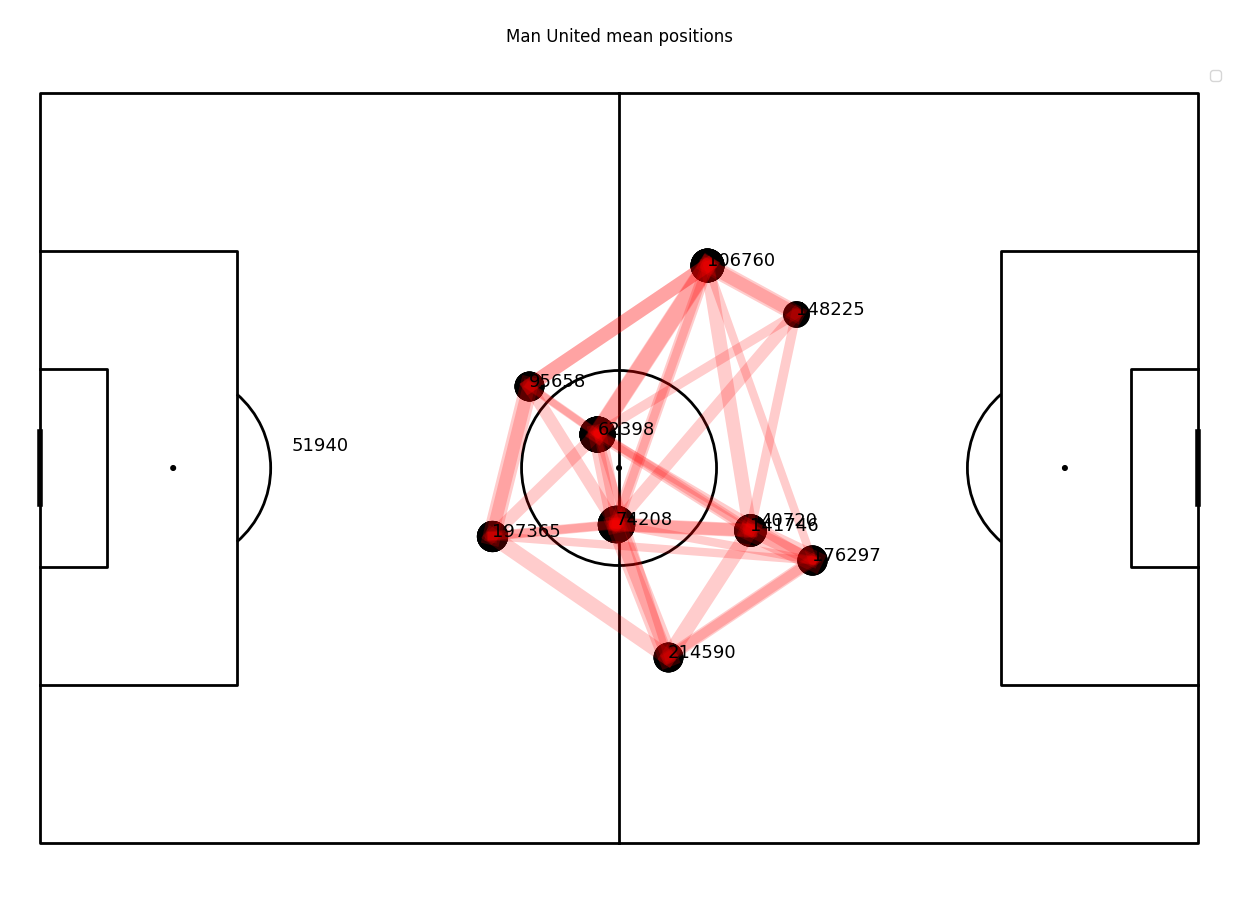

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Assuming you have DataFrames named 'mean_place_united' and 'receiver_counts'
# Replace the names with the actual names of your DataFrames if they're different

# Create pitch
pitch = Pitch(line_color='black', pitch_type='opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Calculate the total passes made by each player
mean_place_united['total_passes'] = mean_place_united['playerId'].map(
    receiver_counts.groupby('playerId')['count'].sum().to_dict()
)

# Draw lines for passes
filtered_receiver_counts = receiver_counts[
    (receiver_counts['playerId'] != -1) &
    (receiver_counts['playerId'] != 195851) &
    (receiver_counts['playerId'] != 220688) &
    (receiver_counts['count'] >= 5)  # Only draw passes if there are at least 3 between the players
]

for index, row in filtered_receiver_counts.iterrows():
    # Check if there is at least one row matching the conditions
    player_rows = mean_place_united[mean_place_united['playerId'] == row['playerId']]
    receiver_rows = mean_place_united[mean_place_united['playerId'] == row['receiver']]

    if not player_rows.empty and not receiver_rows.empty:
        player_x = player_rows['x'].values[0]
        player_y = player_rows['y'].values[0]
        receiver_x = receiver_rows['x'].values[0]
        receiver_y = receiver_rows['y'].values[0]

        # Set the line thickness based on the count of passes
        linewidth = row['count']

        # Set the size of the player points based on the total number of passes
        player_size = mean_place_united.loc[mean_place_united['playerId'] == row['playerId'], 'total_passes'].values[0]

        # Draw the transparent line in black
        ax['pitch'].plot([player_x, receiver_x], [player_y, receiver_y], color='red', linewidth=linewidth, alpha=0.2)

        # Scatter plot for player positions with size based on the total number of passes
        pitch.scatter(player_x, player_y, color='black', ax=ax['pitch'], alpha=1, s=player_size * 10)

# Annotate player IDs
for i, txt in enumerate(mean_place_united['playerId']):
    ax['pitch'].annotate(txt, (mean_place_united['x'][i], mean_place_united['y'][i]), fontsize=13)

fig.suptitle('Man United mean positions')
ax['pitch'].legend(labelspacing=2)
plt.show()


In [ ]:
receiver = []

for i in range(len(burnley_passes) - 1):
    if ((burnley_passes['description'].iloc[i] == 'Successful Pass')):
        receiver.append(burnley_passes['playerId'].iloc[i + 1])
    else:
        receiver.append(0)

receiver = pd.Series(receiver, name='receiver')
burnley_passes = burnley_passes.reset_index()
burnley_passes = pd.concat([burnley_passes,receiver], axis=1)
burnley_passes['receiver'] = burnley_passes['receiver'].fillna(0).astype(int)
burnley_passes


,index,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description,receiver
0,0,2253487625,1,True,0,0,90,60551,2021-01-12T20:16:48.181,"[{'qualifierId': 213, 'value': '3.1'}, {'quali...",50.3,50.3,Kick-off,0
1,1,2253487639,1,True,0,2,90,17761,2021-01-12T20:16:50.991,"[{'qualifierId': 178}, {'qualifierId': 213, 'v...",29.6,53.4,Successful Pass,68983
2,2,2253487685,1,True,0,7,90,68983,2021-01-12T20:16:55.444,"[{'qualifierId': 1}, {'qualifierId': 213, 'val...",41.3,18.4,Successful Pass,172782
3,8,2253488079,1,False,0,50,90,172782,2021-01-12T20:17:38.394,"[{'qualifierId': 56, 'value': 'Center'}, {'qua...",43.3,19.8,Failed Pass,0
4,12,2253488265,1,True,1,6,90,39487,2021-01-12T20:17:55.084,"[{'qualifierId': 140, 'value': '78.0'}, {'qual...",40.0,0.0,Throw-in Taken,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1323,2253526361,1,True,96,49,90,17761,2021-01-12T22:12:54.437,"[{'qualifierId': 213, 'value': '0.8'}, {'quali...",22.6,5.9,Successful Pass,60551
369,1324,2253526369,1,True,96,53,90,60551,2021-01-12T22:12:57.952,"[{'qualifierId': 212, 'value': '7.6'}, {'quali...",20.8,13.7,Successful Pass,17761
370,1325,2253526371,1,False,96,53,90,17761,2021-01-12T22:12:58.713,"[{'qualifierId': 155}, {'qualifierId': 178}, {...",17.4,3.8,Failed Pass,0
371,1327,2253526387,1,True,97,11,90,68983,2021-01-12T22:13:16.729,"[{'qualifierId': 56, 'value': 'Back'}, {'quali...",22.8,0.0,Throw-in Taken,0


In [ ]:
receiver_counts_burnley = burnley_passes.groupby(['playerId', 'receiver']).size().reset_index(name='count')
receiver_counts_burnley = receiver_counts_burnley[receiver_counts_burnley['receiver'] != 0]
receiver_counts_burnley = receiver_counts_burnley[(receiver_counts_burnley['playerId'] != -1) & (receiver_counts_burnley['playerId'] != 433154) & (receiver_counts_burnley['playerId'] != 81183) & (receiver_counts_burnley['playerId'] != 44683)]
receiver_counts_burnley

,playerId,receiver,count
1,17761,17761,1
2,17761,39487,2
3,17761,44699,1
4,17761,51927,5
5,17761,60551,2
...,...,...,...
94,172782,60586,1
95,172782,68983,3
96,172782,98747,1
97,172782,172782,1


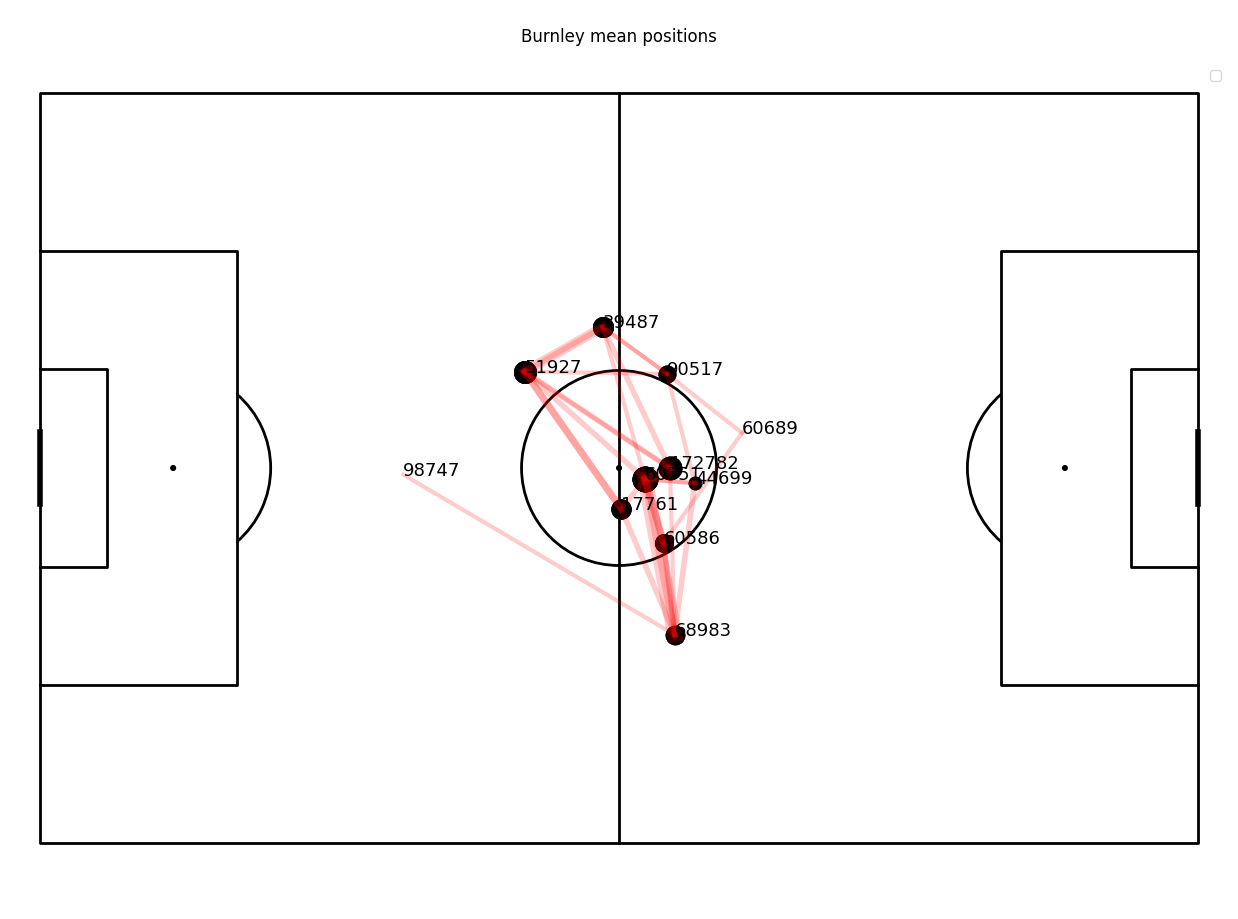

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Assuming you have DataFrames named 'mean_place_united' and 'receiver_counts'
# Replace the names with the actual names of your DataFrames if they're different

# Create pitch
pitch = Pitch(line_color='black', pitch_type='opta')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Calculate the total passes made by each player
mean_place_burnley['total_passes'] = mean_place_burnley['playerId'].map(
    receiver_counts_burnley.groupby('playerId')['count'].sum().to_dict()
)

# Draw lines for passes
filtered_receiver_counts = receiver_counts_burnley[
    (receiver_counts_burnley['playerId'] != -1) &
    (receiver_counts_burnley['playerId'] != 195851) &
    (receiver_counts_burnley['playerId'] != 220688) &
    (receiver_counts_burnley['count'] >= 3)  # Only draw passes if there are at least 3 between the players
]

for index, row in filtered_receiver_counts.iterrows():
    # Check if there is at least one row matching the conditions
    player_rows = mean_place_burnley[mean_place_burnley['playerId'] == row['playerId']]
    receiver_rows = mean_place_burnley[mean_place_burnley['playerId'] == row['receiver']]

    if not player_rows.empty and not receiver_rows.empty:
        player_x = player_rows['x'].values[0]
        player_y = player_rows['y'].values[0]
        receiver_x = receiver_rows['x'].values[0]
        receiver_y = receiver_rows['y'].values[0]

        # Set the line thickness based on the count of passes
        linewidth = row['count']

        # Set the size of the player points based on the total number of passes
        player_size = mean_place_burnley.loc[mean_place_burnley['playerId'] == row['playerId'], 'total_passes'].values[0]

        # Draw the transparent line in black
        ax['pitch'].plot([player_x, receiver_x], [player_y, receiver_y], color='red', linewidth=linewidth, alpha=0.2)

        # Scatter plot for player positions with size based on the total number of passes
        pitch.scatter(player_x, player_y, color='black', ax=ax['pitch'], alpha=1, s=player_size * 10)

# Annotate player IDs
for i, txt in enumerate(mean_place_burnley['playerId']):
    ax['pitch'].annotate(txt, (mean_place_burnley['x'][i], mean_place_burnley['y'][i]), fontsize=13)

fig.suptitle('Burnley mean positions')
ax['pitch'].legend(labelspacing=2)
plt.show()

In [ ]:
positions.head(5)

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,ay,player_id,player_position,player_with_event,club,index,event number,index,eventId
0,0,1,defense,20.5699,69.59,71.80,14.8252,0.1406,-0.2693,0.0,0.0,197365,RCB,False,Man United,0.0,1.0,0,2253487625
1,1,1,defense,19.6386,68.70,40.85,-6.2192,-0.3755,-0.0670,0.0,0.0,106760,LWB,False,Man United,1.0,1.0,1,2253487625
2,2,1,defense,20.9583,69.96,60.10,6.8664,0.2215,-0.1173,0.0,0.0,95658,LCB,False,Man United,2.0,1.0,2,2253487625
3,3,90,offense,1.3090,51.25,75.83,17.5660,3.4401,-1.7631,0.0,0.0,60689,RF,False,Burnley,3.0,1.0,3,2253487625
4,4,90,offense,-22.8974,28.19,77.05,18.3917,0.1564,0.7657,0.0,0.0,51927,LCB,False,Burnley,4.0,1.0,4,2253487625


In [ ]:
pogba_positions = positions[['x_opta','y_opta','player_id']]
pogba_positions = pogba_positions[pogba_positions['player_id'] == 74208]
pogba_positions = pogba_positions.reset_index()
pogba_positions

,index,x_opta,y_opta,player_id
0,15,66.07,76.59,74208
1,33,67.30,78.70,74208
2,56,69.56,55.41,74208
3,70,80.74,57.57,74208
4,86,35.38,32.93,74208
...,...,...,...,...
1095,18761,79.95,10.17,74208
1096,18779,87.35,30.19,74208
1097,18922,30.04,10.27,74208
1098,18930,28.94,10.88,74208


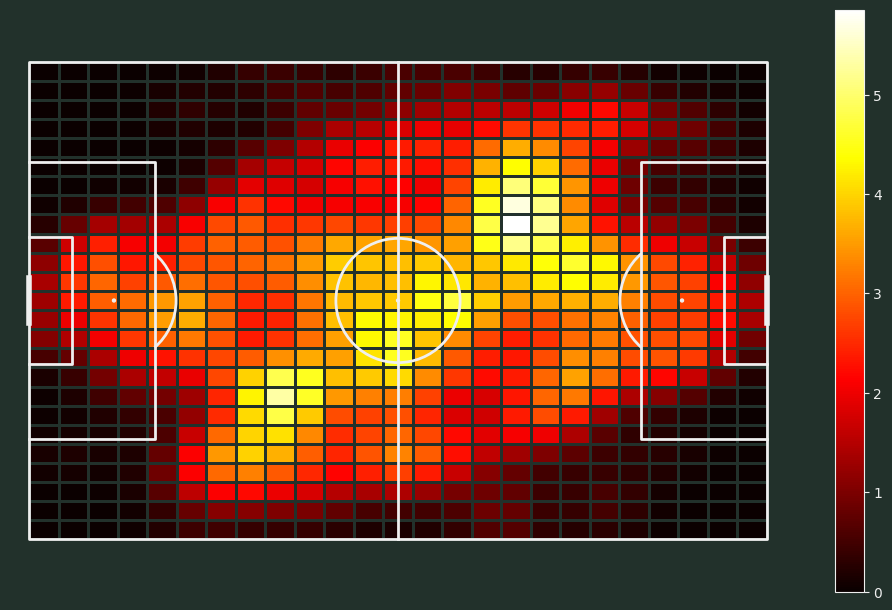

In [ ]:
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(pogba_positions.x_opta, pogba_positions.y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [ ]:
bissaka_positions = positions[['x_opta','y_opta','player_id']]
bissaka_positions = bissaka_positions[bissaka_positions['player_id'] == 106760]
bissaka_positions = bissaka_positions.reset_index()
bissaka_positions

,index,x_opta,y_opta,player_id
0,1,68.70,40.85,106760
1,38,72.51,29.10,106760
2,59,86.67,44.15,106760
3,74,22.08,89.62,106760
4,157,28.66,65.68,106760
...,...,...,...,...
868,18783,88.11,44.10,106760
869,18810,60.83,8.51,106760
870,18830,32.37,90.21,106760
871,18850,67.63,9.79,106760


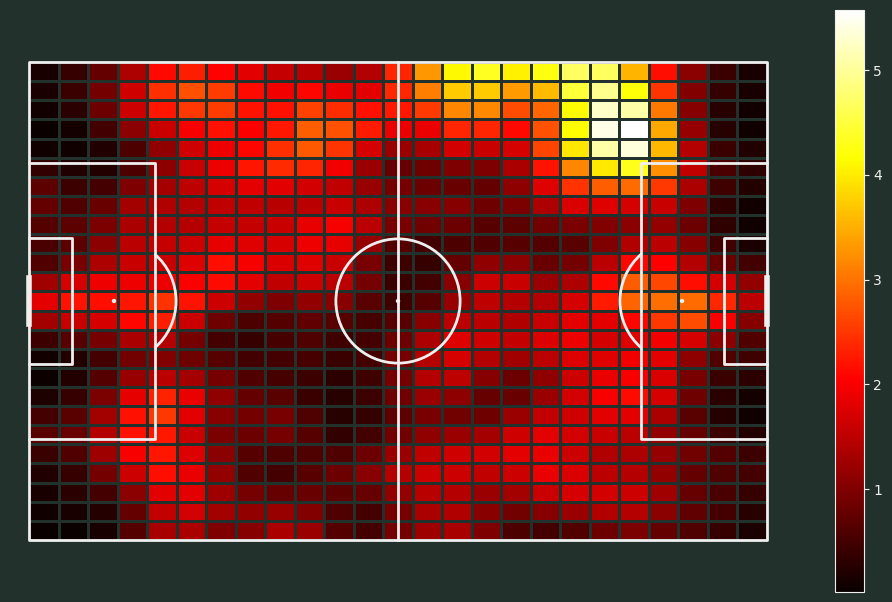

In [ ]:
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(bissaka_positions.x_opta, bissaka_positions.y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [ ]:
cavani_positions = positions[['x_opta','y_opta','player_id']]
cavani_positions = cavani_positions[cavani_positions['player_id'] == 40720]
cavani_positions = cavani_positions.reset_index()
cavani_positions

,index,x_opta,y_opta,player_id
0,8,49.25,38.03,40720
1,26,38.36,44.57,40720
2,45,45.65,34.94,40720
3,231,54.29,80.57,40720
4,244,47.65,17.04,40720
...,...,...,...,...
817,18889,19.48,17.36,40720
818,18900,19.48,17.36,40720
819,18909,83.99,88.84,40720
820,18916,15.36,10.31,40720


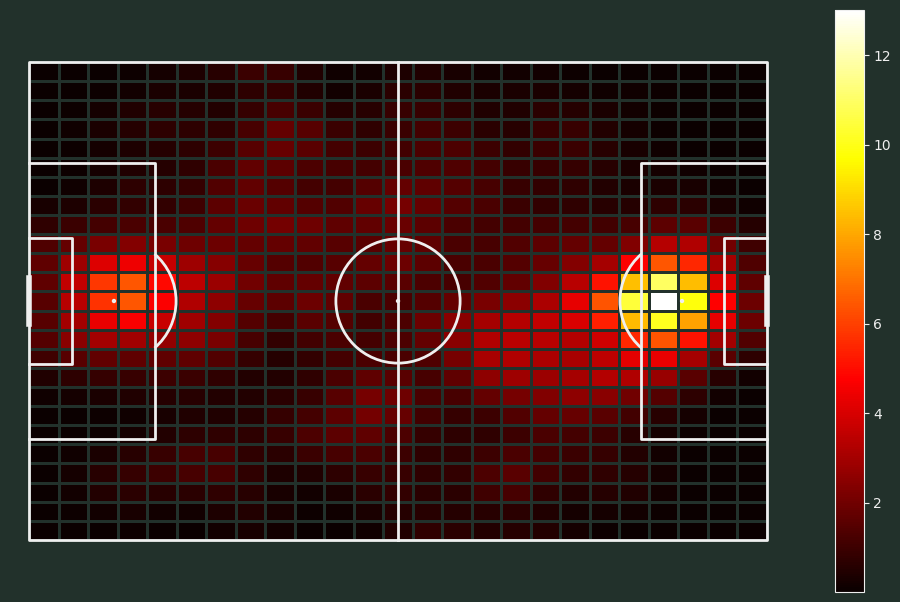

In [ ]:
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(cavani_positions.x_opta, cavani_positions.y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [ ]:
voronoi = positions[['x_opta','y_opta','team','event number']]
manu_voronoi = voronoi[voronoi['team'] == 1]
burnley_voronoi = voronoi[voronoi['team'] == 90]
voronoi

,x_opta,y_opta,team,event number
0,69.59,71.80,1,1.0
1,68.70,40.85,1,1.0
2,69.96,60.10,1,1.0
3,51.25,75.83,90,1.0
4,28.19,77.05,90,1.0
...,...,...,...,...
18938,83.04,87.71,90,NaN
18939,77.36,85.74,90,NaN
18940,70.47,79.71,90,NaN
18941,70.95,88.52,1,NaN


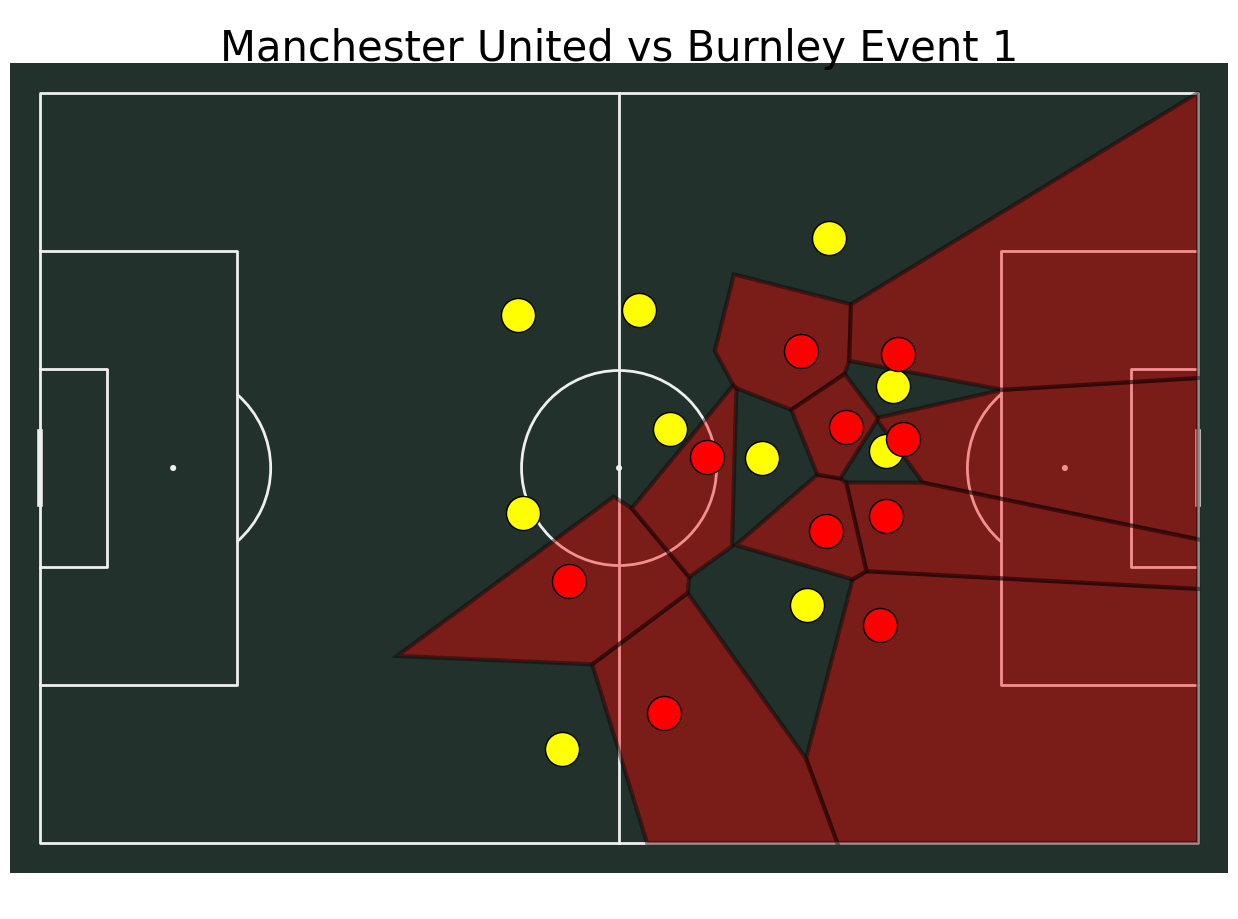

In [ ]:
voronoi1 = voronoi[voronoi['event number'] == 3.0]
manu_voronoi1 = manu_voronoi[manu_voronoi['event number'] == 3.0]
burnley_voronoi1 = burnley_voronoi[burnley_voronoi['event number'] == 3.0]
# Scale the coordinates for Voronoi calculation

# Voronoi for both teams
team1, team2 = pitch.voronoi(voronoi1.x_opta, voronoi1.y_opta, voronoi1.team)

# Voronoi for both teams
team1,team2 = pitch.voronoi(voronoi1.x_opta, voronoi1.y_opta, voronoi1.team)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Add man u
t1 = pitch.polygon(team1, ax=ax["pitch"], color='red', ec='black', lw=3, alpha=0.4, zorder=2)
# Add burnley
t2 = pitch.polygon(team2, ax=ax["pitch"], color='yellow', ec='black', lw=3, alpha=0.4, zorder=2)

# Plot Man U players
pitch.scatter(manu_voronoi1.x_opta, manu_voronoi1.y_opta, color='red', edgecolors='black', s=600, ax=ax['pitch'], zorder=4)
# Plot Burnley players
pitch.scatter(burnley_voronoi1.x_opta, burnley_voronoi1.y_opta, color='yellow', edgecolors='black', s=600, ax=ax['pitch'], zorder=3)

fig.suptitle("Manchester United vs Burnley Event 1", fontsize=30)
plt.show()
